In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

url = 'https://raw.githubusercontent.com/kocsigabor99/FAODATA-CROPS/main/MOST%20CONSUMED%20CARB%20CROPS.csv'
df = pd.read_csv(url)

url2 = 'https://raw.githubusercontent.com/kocsigabor99/FAODATA-CROPS/main/WHEAT%20FOODBALANCES%202010-2020.csv'
df_feed = pd.read_csv(url2)

In [8]:
df_feed['Area'] = df_feed['Area'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
df['Area'] = df['Area'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
df['Area'] = df['Area'].replace('United States of America', 'USA')
df_feed['Area'] = df_feed['Area'].replace('United States of America', 'USA')

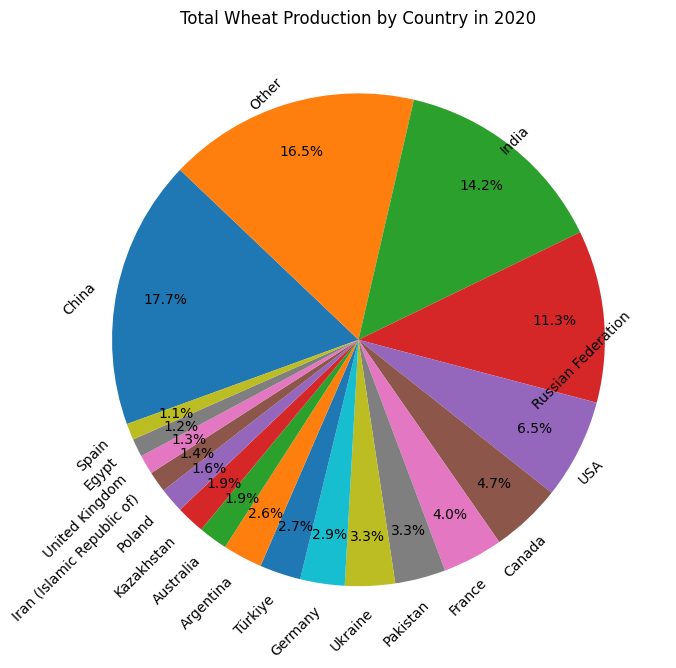

In [9]:
df_world = df[(df['Element'] == 'Production') & (df['Item'] == 'Wheat') & (df['Year'] == 2020) & (~df['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries']))]

pivot_table = pd.pivot_table(df_world, index='Area', values='Value')

# Calculate the percentage of total production for each country
total_production = pivot_table['Value'].sum()
pivot_table['Percentage'] = pivot_table['Value'] / total_production * 100

# Group countries that have less than 2% of total production into 'Other'
threshold = 1.0
other_countries = pivot_table[pivot_table['Percentage'] < threshold]
other_value = other_countries['Value'].sum()
other_percentage = other_value / total_production * 100
pivot_table = pivot_table[pivot_table['Percentage'] >= threshold]
pivot_table.loc['Other'] = [other_value, other_percentage]

# Sort the values in descending order
pivot_table = pivot_table.sort_values(by='Value', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
wedges, labels = ax.pie(pivot_table['Value'], labels=pivot_table.index, startangle=200, counterclock=False, textprops={'rotation': 45})
plt.setp(labels, rotation_mode='anchor', ha='right', va='center')
plt.title('Total Wheat Production by Country in 2020')
plt.ylabel('')

# Set percentage labels
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = wedge.r * 0.8 * np.cos(np.deg2rad(angle))
    y = wedge.r * 0.8 * np.sin(np.deg2rad(angle))
    ax.text(x, y, f'{pivot_table.iloc[i]["Percentage"]:.1f}%', ha='center', va='center')

plt.show()

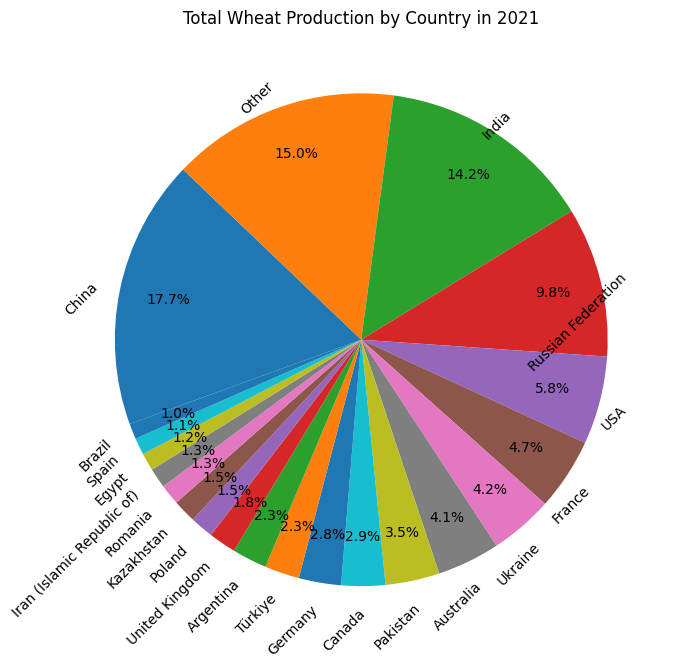

In [10]:
df_world = df[(df['Element'] == 'Production') & (df['Item'] == 'Wheat') & (df['Year'] == 2021) & (~df['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries']))]

pivot_table = pd.pivot_table(df_world, index='Area', values='Value')

# Calculate the percentage of total production for each country
total_production = pivot_table['Value'].sum()
pivot_table['Percentage'] = pivot_table['Value'] / total_production * 100

# Group countries that have less than 2% of total production into 'Other'
threshold = 1.0
other_countries = pivot_table[pivot_table['Percentage'] < threshold]
other_value = other_countries['Value'].sum()
other_percentage = other_value / total_production * 100
pivot_table = pivot_table[pivot_table['Percentage'] >= threshold]
pivot_table.loc['Other'] = [other_value, other_percentage]

# Sort the values in descending order
pivot_table = pivot_table.sort_values(by='Value', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
wedges, labels = ax.pie(pivot_table['Value'], labels=pivot_table.index, startangle=200, counterclock=False, textprops={'rotation': 45})
plt.setp(labels, rotation_mode='anchor', ha='right', va='center')
plt.title('Total Wheat Production by Country in 2021')
plt.ylabel('')

# Set percentage labels
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = wedge.r * 0.8 * np.cos(np.deg2rad(angle))
    y = wedge.r * 0.8 * np.sin(np.deg2rad(angle))
    ax.text(x, y, f'{pivot_table.iloc[i]["Percentage"]:.1f}%', ha='center', va='center')

plt.show()

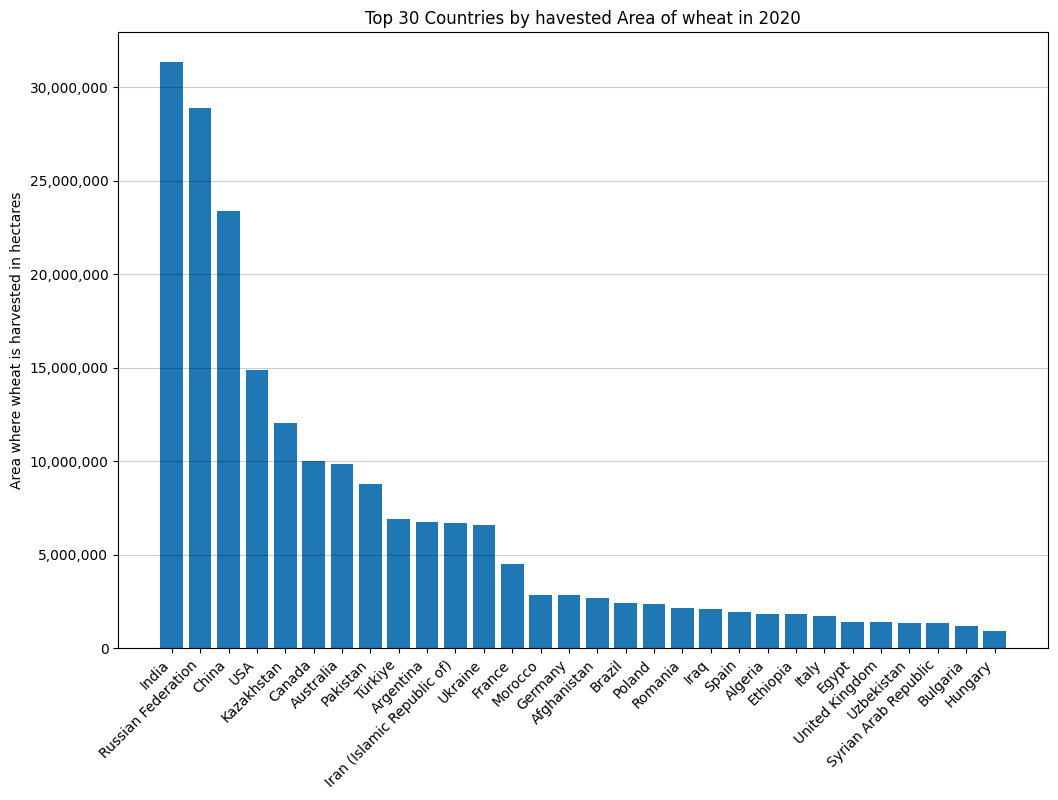

In [31]:
df_top30ha = df[(df['Element'] == 'Area harvested') & (df['Item'] == 'Wheat') &
              (~df['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries'])) &   
                (df['Year'] == 2020)]

df_top30ha = df_top30ha.sort_values('Value', ascending=False)

top30ha = df_top30ha.head(30)

def format_with_commas(x, pos):
    return "{:,}".format(int(x))

plt.figure(figsize=(12,8))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_commas))
plt.bar(top30ha['Area'], top30ha['Value'])
plt.ylabel('Area where wheat is harvested in hectares')
plt.title('Top 30 Countries by havested Area of wheat in 2020')
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

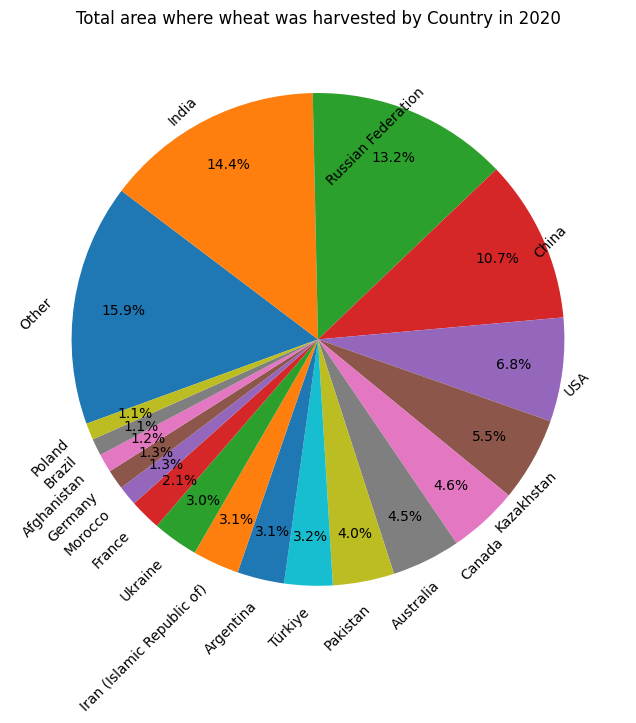

In [33]:
df_world = df[(df['Element'] == 'Area harvested') & (df['Item'] == 'Wheat') & (df['Year'] == 2020) & (~df['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries']))]

pivot_table = pd.pivot_table(df_world, index='Area', values='Value')

# Calculate the percentage of total production for each country
total_production = pivot_table['Value'].sum()
pivot_table['Percentage'] = pivot_table['Value'] / total_production * 100

# Group countries that have less than 2% of total production into 'Other'
threshold = 1.0
other_countries = pivot_table[pivot_table['Percentage'] < threshold]
other_value = other_countries['Value'].sum()
other_percentage = other_value / total_production * 100
pivot_table = pivot_table[pivot_table['Percentage'] >= threshold]
pivot_table.loc['Other'] = [other_value, other_percentage]

# Sort the values in descending order
pivot_table = pivot_table.sort_values(by='Value', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
wedges, labels = ax.pie(pivot_table['Value'], labels=pivot_table.index, startangle=200, counterclock=False, textprops={'rotation': 45})
plt.setp(labels, rotation_mode='anchor', ha='right', va='center')
plt.title('Total area where wheat was harvested by Country in 2020')
plt.ylabel('')

# Set percentage labels
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = wedge.r * 0.8 * np.cos(np.deg2rad(angle))
    y = wedge.r * 0.8 * np.sin(np.deg2rad(angle))
    ax.text(x, y, f'{pivot_table.iloc[i]["Percentage"]:.1f}%', ha='center', va='center')

plt.show()

In [12]:
df_top10 = df[(df['Element'] == 'Production') & (df['Item'] == 'Wheat') &
              (~df['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries'])) & 
              (df['Year'] == 2021)]

df_top10 = df_top10.sort_values('Value', ascending=False)
df_top10.head(10)

Domain                      Area     Element  \
40709   Crops and livestock products                     China  Production   
96214   Crops and livestock products                     India  Production   
166466  Crops and livestock products        Russian Federation  Production   
207114  Crops and livestock products  United States of America  Production   
75869   Crops and livestock products                    France  Production   
201935  Crops and livestock products                   Ukraine  Production   
9662    Crops and livestock products                 Australia  Production   
149535  Crops and livestock products                  Pakistan  Production   
34635   Crops and livestock products                    Canada  Production   
80224   Crops and livestock products                   Germany  Production   

         Item  Year        Value  
40709   Wheat  2021  136952000.0  
96214   Wheat  2021  109590000.0  
166466  Wheat  2021   76057258.0  
207114  Wheat  2021   44790360.0  
75869   Wheat  2021   36559450.0  
201935  Wheat  2021   32183300.0  
9662    Wheat  2021   31922554.7  
149535  Wheat  2021   27464081.0  
34635   Wheat  2021   22296100.0  
80224   Wheat  2021   21459200.0

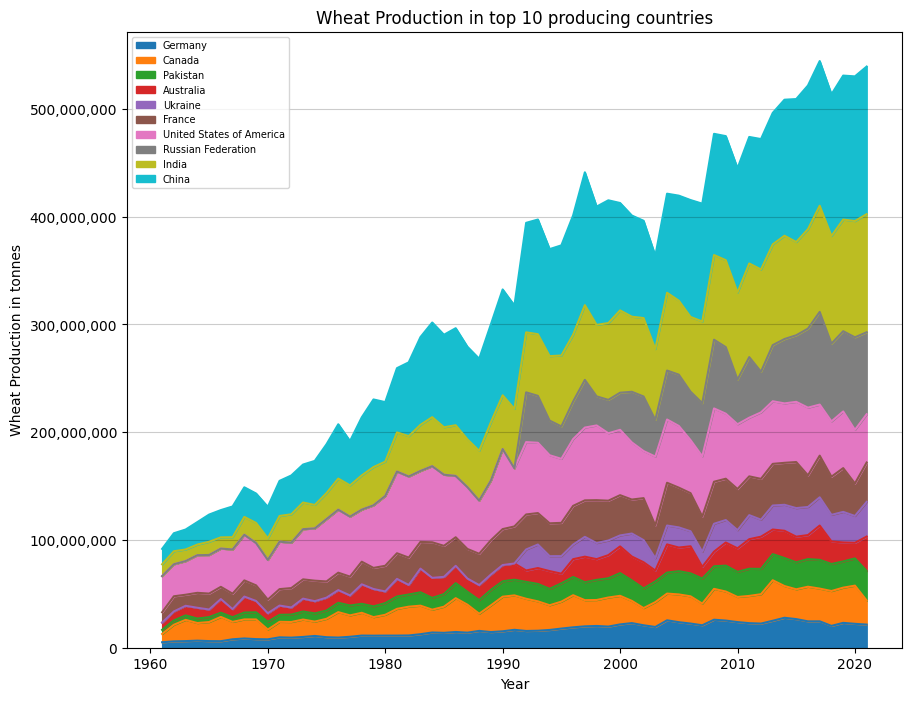

In [140]:
df_top10 = df[(df['Element'] == 'Production') & (df['Item'] == 'Wheat') &
              (~df['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries'])) & 
               (df['Area'].isin(['China', 'India', 'Russian Federation', 'United States of America', 'France', 'Ukraine', 'Australia', 'Pakistan', 'Canada', 'Germany'])) &   
                (df['Year'].between(1961, 2021))]

df_top10 = df_top10.sort_values('Value', ascending=False)

pivot_table = pd.pivot_table(df_top10, index='Year', columns='Area', values='Value')
pivot_table = pivot_table.iloc[:, pivot_table.iloc[-1, :].argsort()]

def format_with_commas(x, pos):
    return "{:,}".format(int(x))

pivot_table.plot(kind='area', stacked=True, figsize=(10, 8))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_commas))
plt.xlabel('Year')
plt.ylabel('Wheat Production in tonnes')
plt.title('Wheat Production in top 10 producing countries')
plt.legend(prop={'size': 7})
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

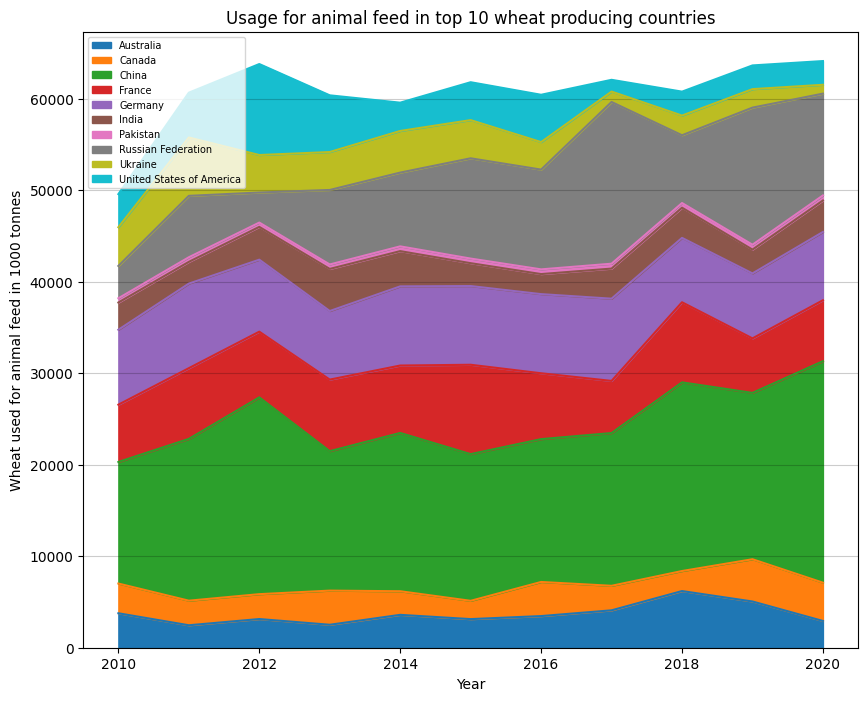

In [141]:
df_top10feed = df_feed[(df_feed['Element'] == 'Feed') & (df_feed['Item'] == 'Wheat and products') &
              (~df_feed['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 'Central America', 'Australia and New Zealand', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries'])) & 
               (df_feed['Area'].isin(['China', 'India', 'Russian Federation', 'United States of America', 'France', 'Ukraine', 'Australia', 'Pakistan', 'Canada', 'Germany'])) &   
                (df_feed['Year'].between(2010, 2020))]

df_top10feed = df_top10feed.sort_values('Value', ascending=False)
pivot_table = pd.pivot_table(df_top10feed, index='Year', columns='Area', values='Value')

pivot_table.plot(kind='area', stacked=True, figsize=(10, 8))
plt.xlabel('Year')
plt.ylabel('Wheat used for animal feed in 1000 tonnes')
plt.title('Usage for animal feed in top 10 wheat producing countries in 2021')
plt.legend(prop={'size': 7})
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

In [15]:
df_top10 = df[(df['Element'] == 'Production') & (df['Item'] == 'Wheat') &
              (~df['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries'])) & 
              (df['Year'] == 2021)]
df_top10 = df_top10.sort_values('Value', ascending=False)
print(df_top10.iloc[10:20])

                              Domain  \
198867  Crops and livestock products   
7513    Crops and livestock products   
203186  Crops and livestock products   
158081  Crops and livestock products   
108112  Crops and livestock products   
165656  Crops and livestock products   
98227   Crops and livestock products   
66462   Crops and livestock products   
183367  Crops and livestock products   
25058   Crops and livestock products   

                                                     Area     Element   Item  \
198867                                            Türkiye  Production  Wheat   
7513                                            Argentina  Production  Wheat   
203186  United Kingdom of Great Britain and Northern I...  Production  Wheat   
158081                                             Poland  Production  Wheat   
108112                                         Kazakhstan  Production  Wheat   
165656                                            Romania  Production  Wheat   

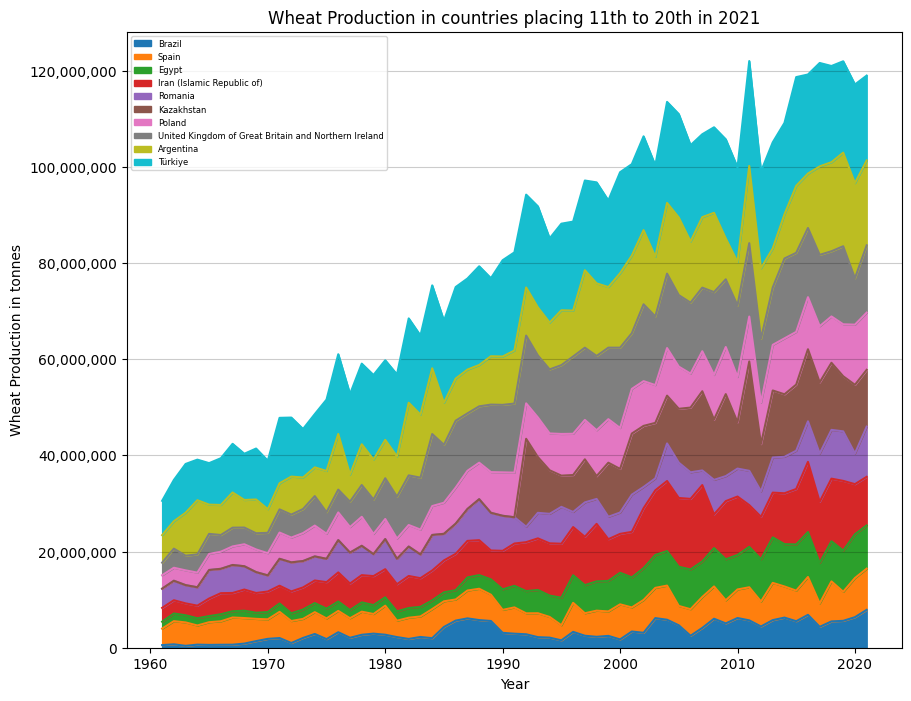

In [5]:
df_1120 = df[(df['Element'] == 'Production') & (df['Item'] == 'Wheat') &
              (~df['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries'])) & 
               (df['Area'].isin(['Türkiye', 'Argentina', 'United Kingdom of Great Britain and Northern Ireland', 'Poland', 'Kazakhstan', 'Romania', 'Iran (Islamic Republic of)', 'Egypt', 'Spain', 'Brazil'])) &   
                (df['Year'].between(1961, 2021))]


df_1120 = df_1120.sort_values('Value', ascending=False)

pivot_table = pd.pivot_table(df_1120, index='Year', columns='Area', values='Value')
pivot_table = pivot_table.iloc[:, pivot_table.iloc[-1, :].argsort()]

def format_with_commas(x, pos):
    return "{:,}".format(int(x))

pivot_table.plot(kind='area', stacked=True, figsize=(10, 8))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_commas))
plt.xlabel('Year')
plt.ylabel('Wheat Production in tonnes')
plt.title('Wheat Production in countries placing 11th to 20th in 2021')
plt.legend(prop={'size': 6})
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

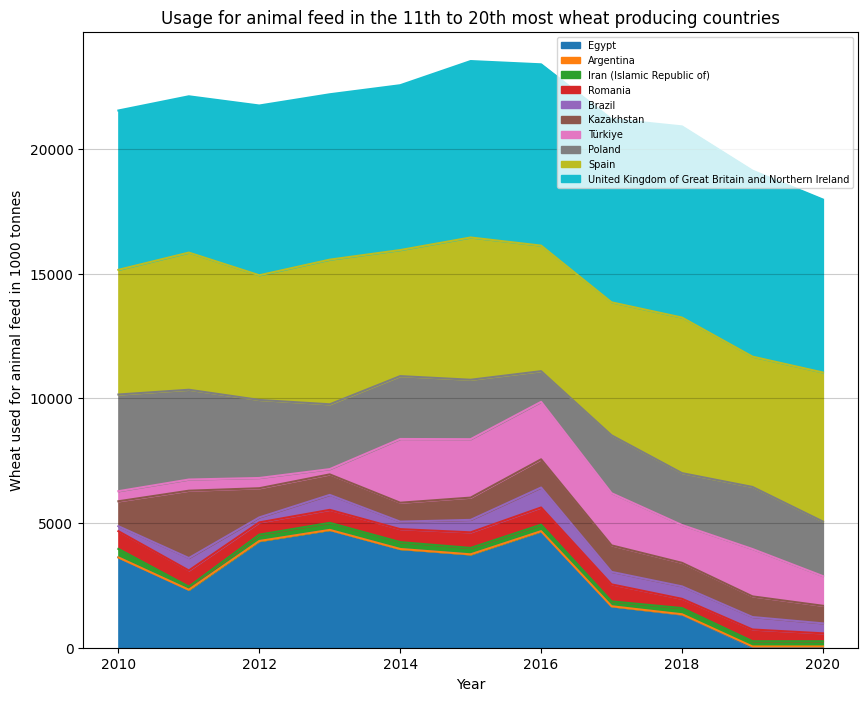

In [82]:
df_1120feed = df_feed[(df_feed['Element'] == 'Feed') & (df_feed['Item'] == 'Wheat and products') &
              (~df_feed['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 'Central America', 'Australia and New Zealand', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries'])) & 
               (df_feed['Area'].isin(['Türkiye', 'Argentina', 'United Kingdom of Great Britain and Northern Ireland', 'Poland', 'Kazakhstan', 'Romania', 'Iran (Islamic Republic of)', 'Egypt', 'Spain', 'Brazil'])) &   
                (df_feed['Year'].between(2010, 2020))]

df_1120feed = df_1120feed.sort_values('Value', ascending=False)

pivot_table = pd.pivot_table(df_1120feed, index='Year', columns='Area', values='Value')
pivot_table = pivot_table.iloc[:, pivot_table.iloc[-1, :].argsort()]

pivot_table.plot(kind='area', stacked=True, figsize=(10, 8))
plt.xlabel('Year')
plt.ylabel('Wheat used for animal feed in 1000 tonnes')
plt.title('Usage for animal feed in the 11th to 20th most wheat producing countries')
plt.legend(prop={'size': 7})
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

In [83]:
df_top10 = df[(df['Element'] == 'Production') & (df['Item'] == 'Wheat') &
              (~df['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries'])) & 
              (df['Year'] == 2021)]
df_top10 = df_top10.sort_values('Value', ascending=False)
print(df_top10.iloc[20:30])

                              Domain        Area     Element   Item  Year  \
132385  Crops and livestock products     Morocco  Production  Wheat  2021   
27220   Crops and livestock products    Bulgaria  Production  Wheat  2021   
103176  Crops and livestock products       Italy  Production  Wheat  2021   
210179  Crops and livestock products  Uzbekistan  Production  Wheat  2021   
94363   Crops and livestock products     Hungary  Production  Wheat  2021   
71088   Crops and livestock products    Ethiopia  Production  Wheat  2021   
55391   Crops and livestock products     Czechia  Production  Wheat  2021   
117651  Crops and livestock products   Lithuania  Production  Wheat  2021   
99636   Crops and livestock products        Iraq  Production  Wheat  2021   
60756   Crops and livestock products     Denmark  Production  Wheat  2021   

            Value  
132385  7543847.9  
27220   7342990.0  
103176  7294570.0  
210179  5984756.0  
94363   5290140.0  
71088   5214000.0  
55391   4960

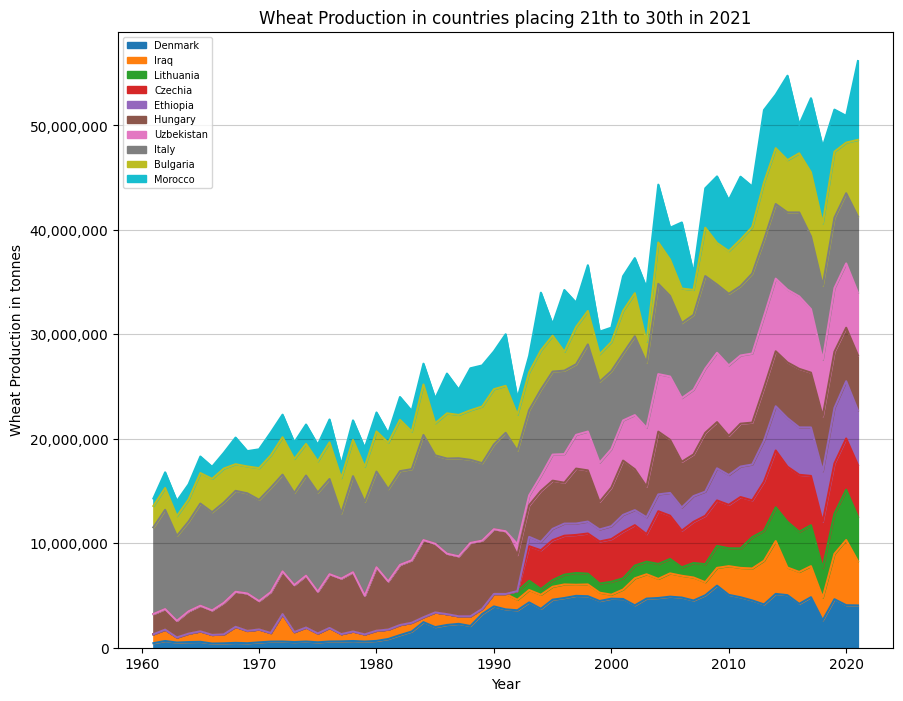

In [6]:
df_2130 = df[(df['Element'] == 'Production') & (df['Item'] == 'Wheat') &
              (~df['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries'])) & 
               (df['Area'].isin(['Morocco', 'Bulgaria', 'Italy', 'Uzbekistan', 'Hungary', 'Ethiopia', 'Czechia', 'Lithuania', 'Iraq', 'Denmark'])) &   
                (df['Year'].between(1961, 2021))]

df_2130 = df_2130.sort_values('Value', ascending=False)

pivot_table = pd.pivot_table(df_2130, index='Year', columns='Area', values='Value')
pivot_table = pivot_table.iloc[:, pivot_table.iloc[-1, :].argsort()]

def format_with_commas(x, pos):
    return "{:,}".format(int(x))

pivot_table.plot(kind='area', stacked=True, figsize=(10, 8))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_commas))
plt.xlabel('Year')
plt.ylabel('Wheat Production in tonnes')
plt.title('Wheat Production in countries placing 21th to 30th in 2021')
plt.legend(prop={'size': 7})
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

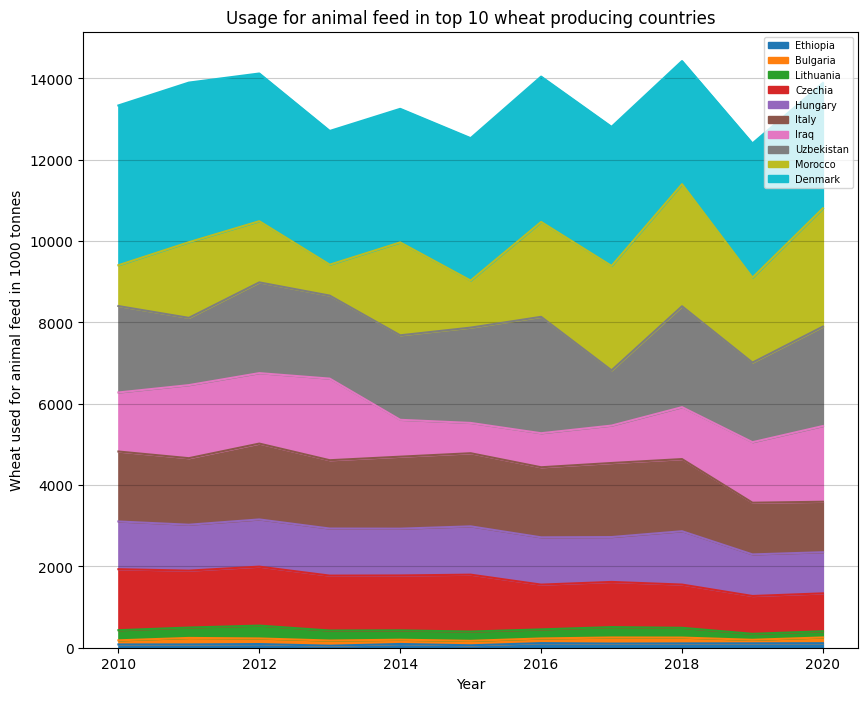

In [62]:
df_2130feed = df_feed[(df_feed['Element'] == 'Feed') & (df_feed['Item'] == 'Wheat and products') &
              (~df_feed['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 'Central America', 'Australia and New Zealand', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries'])) & 
               (df_feed['Area'].isin(['Morocco', 'Bulgaria', 'Italy', 'Uzbekistan', 'Hungary', 'Ethiopia', 'Czechia', 'Lithuania', 'Iraq', 'Denmark'])) &   
                (df_feed['Year'].between(2010, 2020))]

df_2130feed = df_2130feed.sort_values('Value', ascending=False)

pivot_table = pd.pivot_table(df_2130feed, index='Year', columns='Area', values='Value')
pivot_table = pivot_table.iloc[:, pivot_table.iloc[-1, :].argsort()]

pivot_table.plot(kind='area', stacked=True, figsize=(10, 8))
plt.xlabel('Year')
plt.ylabel('Wheat used for animal feed in 1000 tonnes')
plt.title('Usage for animal feed in top 10 wheat producing countries')
plt.legend(prop={'size': 7})
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

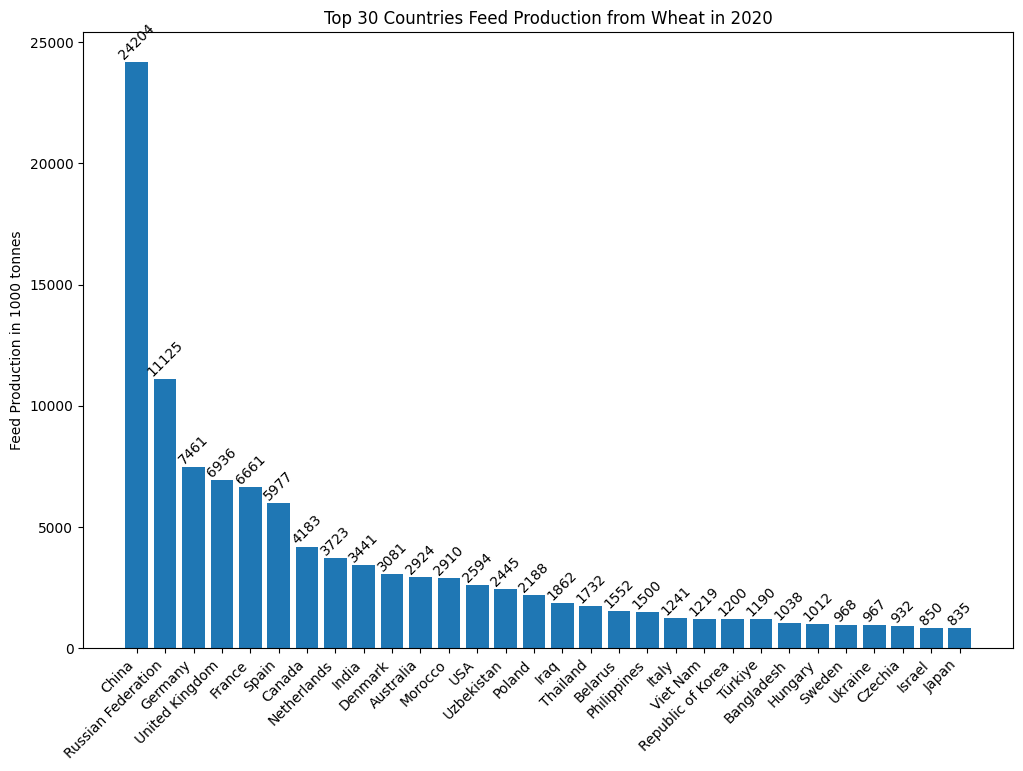

In [12]:
df_top30feed = df_feed[(df_feed['Element'] == 'Feed') & (df_feed['Item'] == 'Wheat and products') &
              (~df_feed['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 'Central America', 'Australia and New Zealand', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries'])) &    
                (df_feed['Year'] == 2020)]

df_top30feed = df_top30feed.sort_values('Value', ascending=False)
top30feed = df_top30feed.head(30)

plt.figure(figsize=(12,8)) # set figure size
plt.bar(top30feed['Area'], top30feed['Value'])
plt.ylabel('Feed Production in 1000 tonnes')
plt.title('Top 30 Countries Feed Production from Wheat in 2020')
plt.xticks(rotation=45, ha='right') # rotate labels by 45 degrees
for i, value in enumerate(top30feed['Value']):
    plt.text(i, value, str(round(value)), rotation=45, ha='center', va='bottom', fontsize=10)
plt.show()

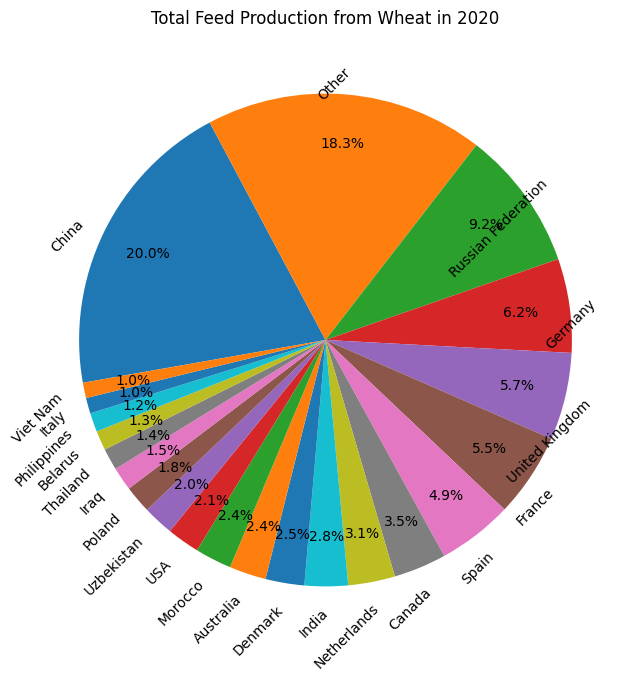

In [34]:
pivot_table = pd.pivot_table(df_top30feed, index='Area', values='Value')

total_production = pivot_table['Value'].sum()
pivot_table['Percentage'] = pivot_table['Value'] / total_production * 100

threshold = 1.0
other_countries = pivot_table[pivot_table['Percentage'] < threshold]
other_value = other_countries['Value'].sum()
other_percentage = other_value / total_production * 100
pivot_table = pivot_table[pivot_table['Percentage'] >= threshold]
pivot_table.loc['Other'] = [other_value, other_percentage]

pivot_table = pivot_table.sort_values(by='Value', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
wedges, labels = ax.pie(pivot_table['Value'], labels=pivot_table.index, startangle=190, counterclock=False, textprops={'rotation': 45})
plt.setp(labels, rotation_mode='anchor', ha='right', va='center')
plt.title('Total Feed Production from Wheat in 2020')
plt.ylabel('')

for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = wedge.r * 0.8 * np.cos(np.deg2rad(angle))
    y = wedge.r * 0.8 * np.sin(np.deg2rad(angle))
    ax.text(x, y, f'{pivot_table.iloc[i]["Percentage"]:.1f}%', ha='center', va='center')
plt.show()

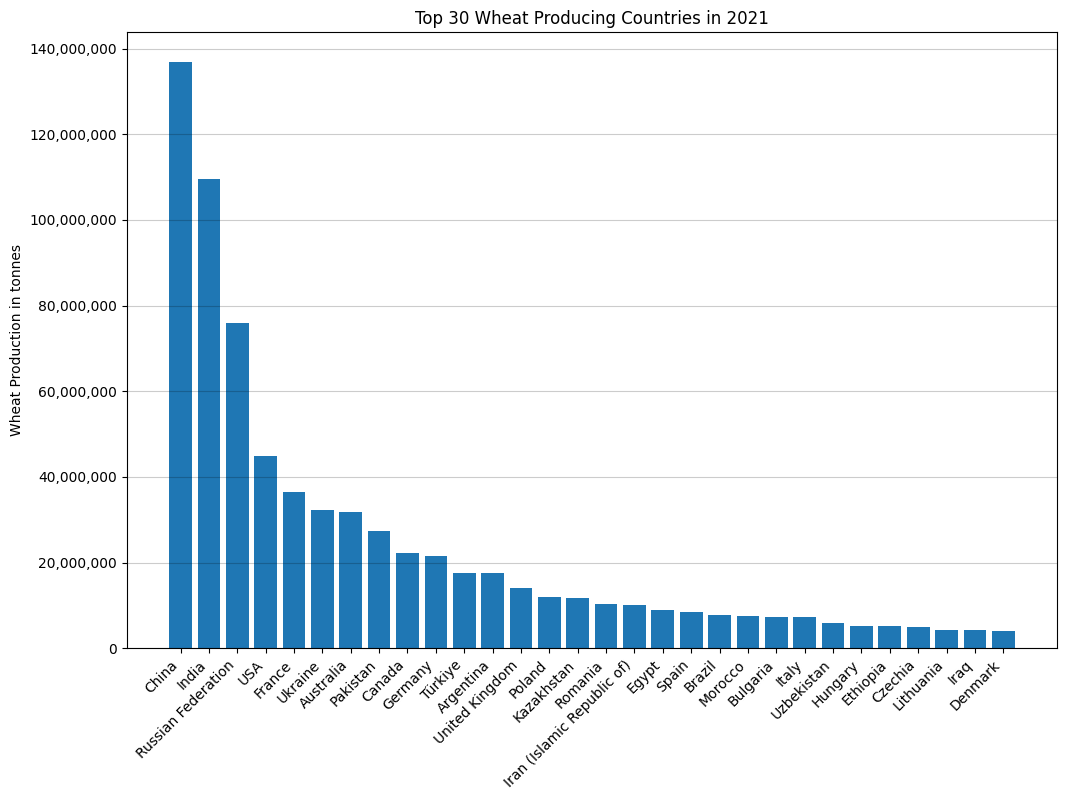

In [17]:
df_top30_21 = df[(df['Element'] == 'Production') & (df['Item'] == 'Wheat') &
              (~df['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries'])) &   
                (df['Year'] == 2021)]

df_top30_21 = df_top30_21.sort_values('Value', ascending=False)

top3021 = df_top30_21.head(30)

def format_with_commas(x, pos):
    return "{:,}".format(int(x))

plt.figure(figsize=(12,8))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_commas))
plt.bar(top3021['Area'], top3021['Value'])
plt.ylabel('Wheat Production in tonnes')
plt.title('Top 30 Wheat Producing Countries in 2021')
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

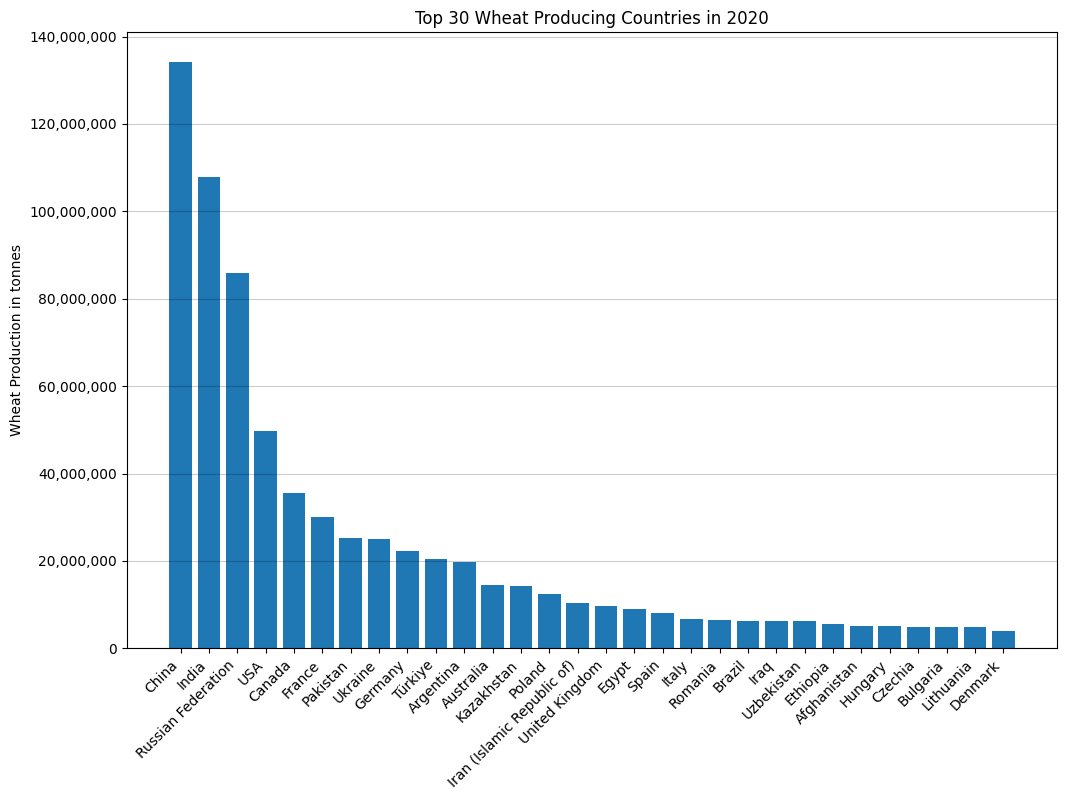

In [16]:
df_top30 = df[(df['Element'] == 'Production') & (df['Item'] == 'Wheat') &
              (~df['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries'])) &   
                (df['Year'] == 2020)]

df_top30 = df_top30.sort_values('Value', ascending=False)

top30 = df_top30.head(30)

def format_with_commas(x, pos):
    return "{:,}".format(int(x))

plt.figure(figsize=(12,8))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_with_commas))
plt.bar(top30['Area'], top30['Value'])
plt.ylabel('Wheat Production in tonnes')
plt.title('Top 30 Wheat Producing Countries in 2020')
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

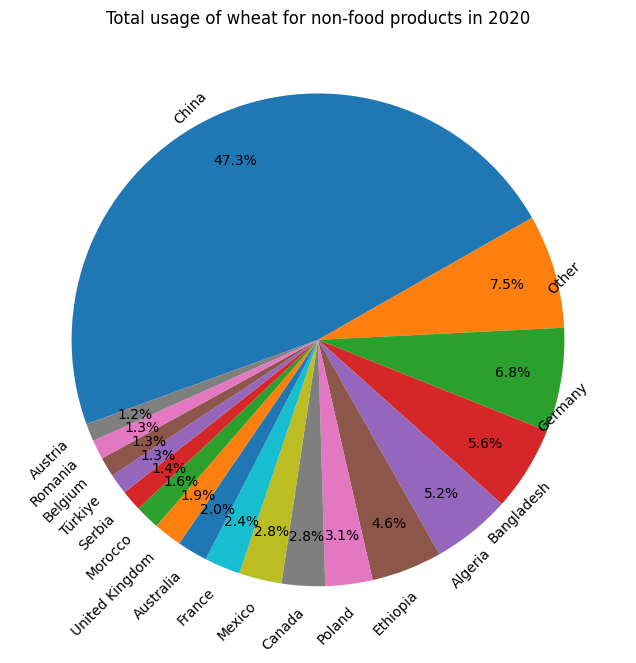

In [18]:
df_nonfood = df_feed[(df_feed['Element'] == 'Other uses (non-food)') & (df_feed['Item'] == 'Wheat and products') &
              (~df_feed['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 'Central America', 'Australia and New Zealand', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries'])) & 
              (df_feed['Year'] == 2020)] 

df_nonfood = df_nonfood.sort_values('Value', ascending=False)
topnonfood = df_nonfood.head(30)

pivot_table = pd.pivot_table(df_nonfood, index='Area', values='Value')

total_production = pivot_table['Value'].sum()
pivot_table['Percentage'] = pivot_table['Value'] / total_production * 100

threshold = 1.0
other_countries = pivot_table[pivot_table['Percentage'] < threshold]
other_value = other_countries['Value'].sum()
other_percentage = other_value / total_production * 100
pivot_table = pivot_table[pivot_table['Percentage'] >= threshold]
pivot_table.loc['Other'] = [other_value, other_percentage]

pivot_table = pivot_table.sort_values(by='Value', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
wedges, labels = ax.pie(pivot_table['Value'], labels=pivot_table.index, startangle=200, counterclock=False, textprops={'rotation': 45})
plt.setp(labels, rotation_mode='anchor', ha='right', va='center')
plt.title('Total usage of wheat for non-food products in 2020')
plt.ylabel('')

for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = wedge.r * 0.8 * np.cos(np.deg2rad(angle))
    y = wedge.r * 0.8 * np.sin(np.deg2rad(angle))
    ax.text(x, y, f'{pivot_table.iloc[i]["Percentage"]:.1f}%', ha='center', va='center')
plt.show()

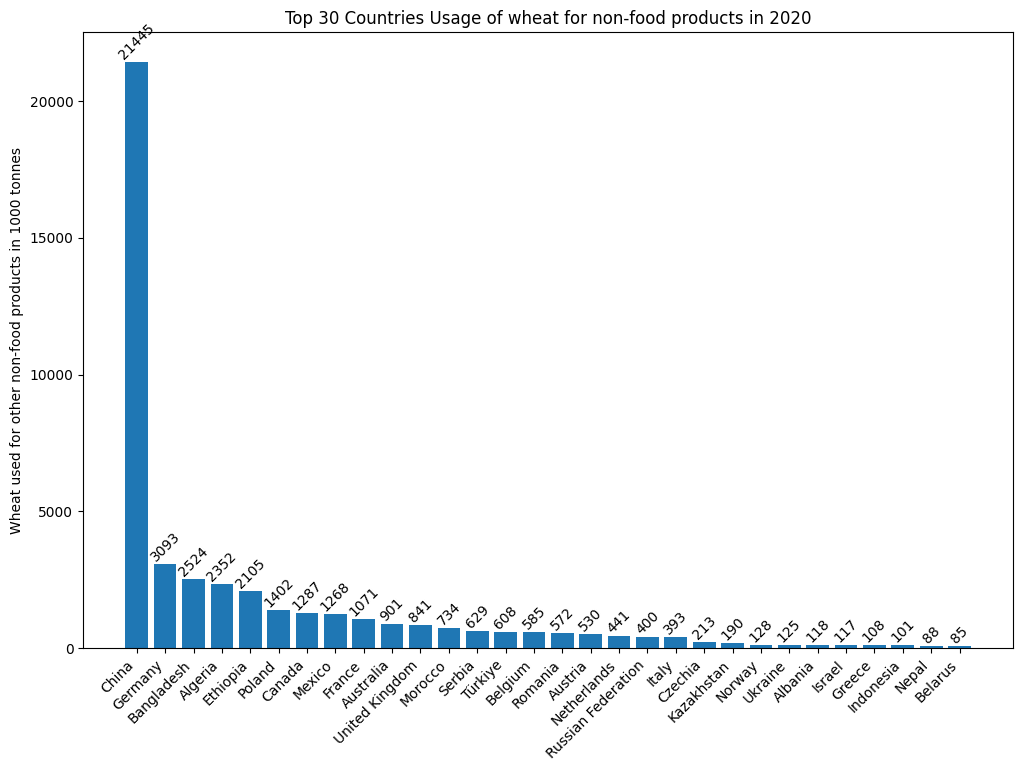

In [19]:
plt.figure(figsize=(12,8))
plt.bar(topnonfood['Area'], topnonfood['Value'])
plt.ylabel('Wheat used for other non-food products in 1000 tonnes')
plt.title('Top 30 Countries Usage of wheat for non-food products in 2020')
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(topnonfood['Value']):
    plt.text(i, value, str(round(value)), rotation=45, ha='center', va='bottom', fontsize=10)
plt.show()

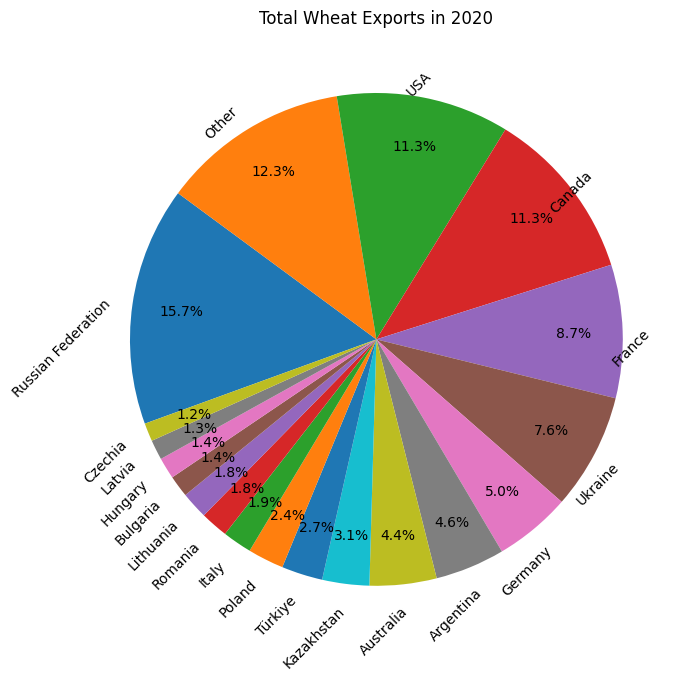

In [20]:
df_export = df_feed[(df_feed['Element'] == 'Export Quantity') & (df_feed['Item'] == 'Wheat and products') &
              (~df_feed['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 'Central America', 'Australia and New Zealand', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries'])) & 
              (df_feed['Year'] == 2020)] 

df_export = df_export.sort_values('Value', ascending=False)
topexport = df_export.head(30)


pivot_table = pd.pivot_table(df_export, index='Area', values='Value')
total_production = pivot_table['Value'].sum()
pivot_table['Percentage'] = pivot_table['Value'] / total_production * 100

threshold = 1.0
other_countries = pivot_table[pivot_table['Percentage'] < threshold]
other_value = other_countries['Value'].sum()
other_percentage = other_value / total_production * 100
pivot_table = pivot_table[pivot_table['Percentage'] >= threshold]
pivot_table.loc['Other'] = [other_value, other_percentage]

pivot_table = pivot_table.sort_values(by='Value', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
wedges, labels = ax.pie(pivot_table['Value'], labels=pivot_table.index, startangle=200, counterclock=False, textprops={'rotation': 45})
plt.setp(labels, rotation_mode='anchor', ha='right', va='center')
plt.title('Total Wheat Exports in 2020')
plt.ylabel('')

for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = wedge.r * 0.8 * np.cos(np.deg2rad(angle))
    y = wedge.r * 0.8 * np.sin(np.deg2rad(angle))
    ax.text(x, y, f'{pivot_table.iloc[i]["Percentage"]:.1f}%', ha='center', va='center')

plt.show()

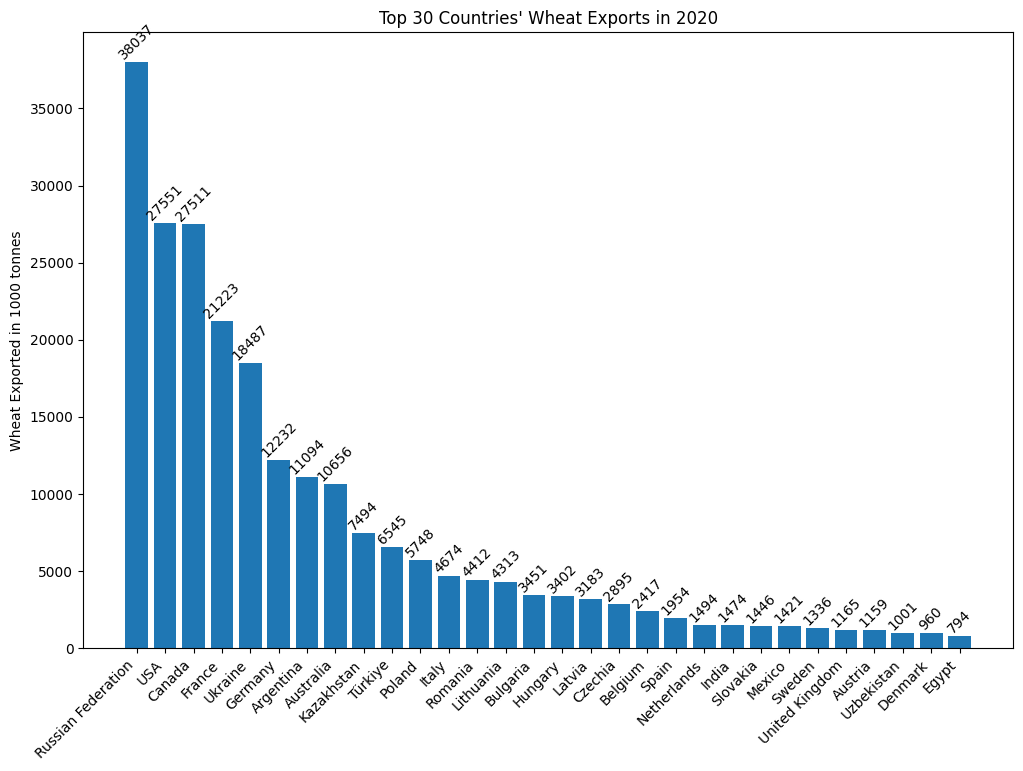

In [21]:
plt.figure(figsize=(12,8))
plt.bar(topexport['Area'], topexport['Value'])
plt.ylabel('Wheat Exported in 1000 tonnes')
plt.title("Top 30 Countries' Wheat Exports in 2020")
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(topexport['Value']):
    plt.text(i, value, str(round(value)), rotation=45, ha='center', va='bottom', fontsize=10)
plt.show()

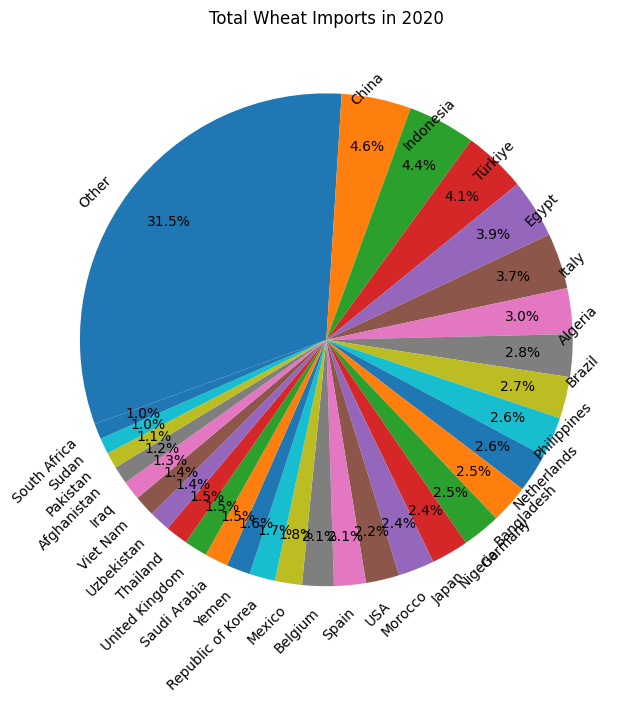

In [45]:
df_import = df_feed[(df_feed['Element'] == 'Import Quantity') & (df_feed['Item'] == 'Wheat and products') &
              (~df_feed['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 'Central America', 'Australia and New Zealand', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries'])) & 
              (df_feed['Year'] == 2020)] 

df_import = df_import.sort_values('Value', ascending=False)
topimport = df_import.head(30)

pivot_table = pd.pivot_table(df_import, index='Area', values='Value')
total_production = pivot_table['Value'].sum()
pivot_table['Percentage'] = pivot_table['Value'] / total_production * 100

threshold = 1.0
other_countries = pivot_table[pivot_table['Percentage'] < threshold]
other_value = other_countries['Value'].sum()
other_percentage = other_value / total_production * 100
pivot_table = pivot_table[pivot_table['Percentage'] >= threshold]
pivot_table.loc['Other'] = [other_value, other_percentage]

pivot_table = pivot_table.sort_values(by='Value', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
wedges, labels = ax.pie(pivot_table['Value'], labels=pivot_table.index, startangle=200, counterclock=False, textprops={'rotation': 45})
plt.setp(labels, rotation_mode='anchor', ha='right', va='center')
plt.title('Total Wheat Imports in 2020')
plt.ylabel('')

for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = wedge.r * 0.8 * np.cos(np.deg2rad(angle))
    y = wedge.r * 0.8 * np.sin(np.deg2rad(angle))
    ax.text(x, y, f'{pivot_table.iloc[i]["Percentage"]:.1f}%', ha='center', va='center')

plt.show()

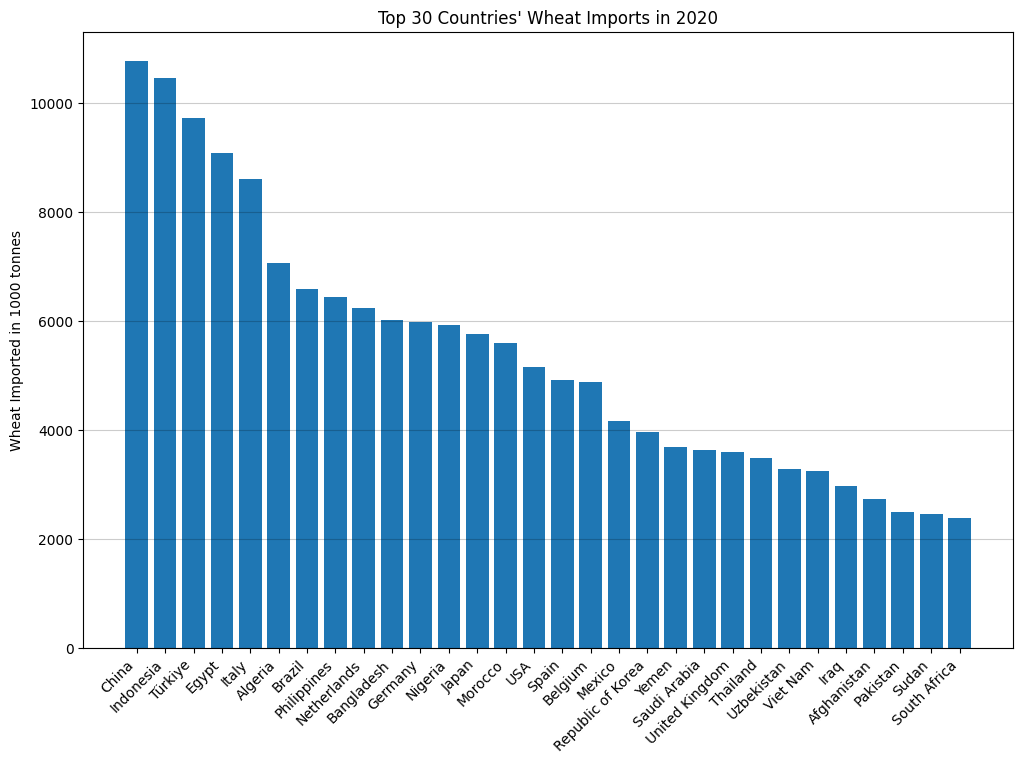

In [23]:
plt.figure(figsize=(12,8))
plt.bar(topimport['Area'], topimport['Value'])
plt.ylabel('Wheat Imported in 1000 tonnes')
plt.title("Top 30 Countries' Wheat Imports in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

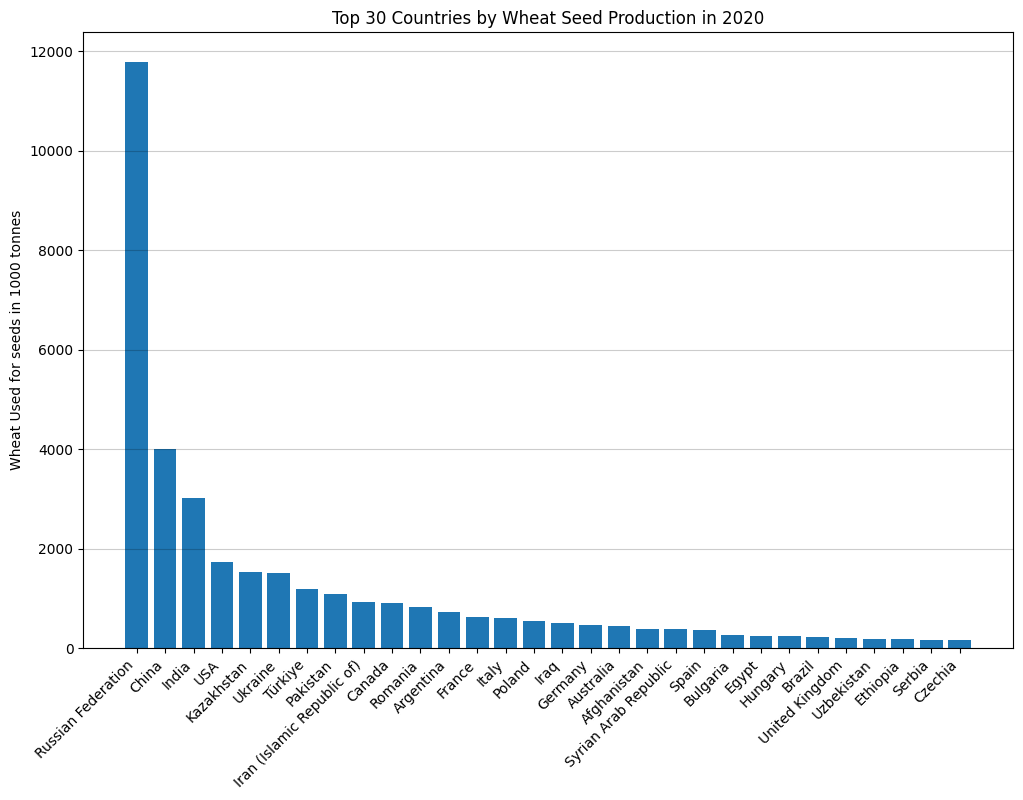

In [25]:
df_seed = df_feed[(df_feed['Element'] == 'Seed') & (df_feed['Item'] == 'Wheat and products') &
              (~df_feed['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 'Central America', 'Australia and New Zealand', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries'])) & 
              (df_feed['Year'] == 2020)] 

df_seed = df_seed.sort_values('Value', ascending=False)
topseed = df_seed.head(30)

plt.figure(figsize=(12,8))
plt.bar(topseed['Area'], topseed['Value'])
plt.ylabel('Wheat Used for seeds in 1000 tonnes')
plt.title("Top 30 Countries by Wheat Seed Production in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

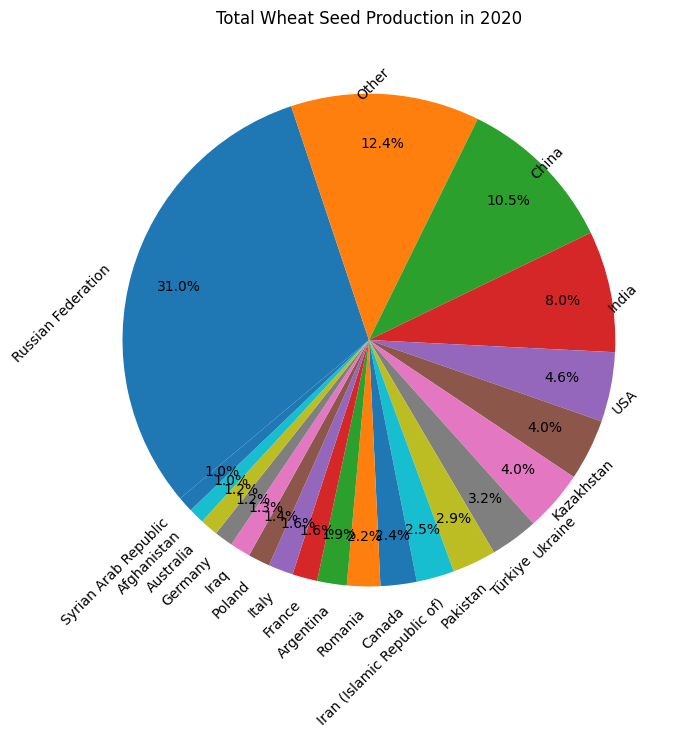

In [26]:
pivot_table = pd.pivot_table(df_seed, index='Area', values='Value')
total_production = pivot_table['Value'].sum()
pivot_table['Percentage'] = pivot_table['Value'] / total_production * 100

threshold = 1.0
other_countries = pivot_table[pivot_table['Percentage'] < threshold]
other_value = other_countries['Value'].sum()
other_percentage = other_value / total_production * 100
pivot_table = pivot_table[pivot_table['Percentage'] >= threshold]
pivot_table.loc['Other'] = [other_value, other_percentage]

pivot_table = pivot_table.sort_values(by='Value', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
wedges, labels = ax.pie(pivot_table['Value'], labels=pivot_table.index, startangle=220, counterclock=False, textprops={'rotation': 45})
plt.setp(labels, rotation_mode='anchor', ha='right', va='center')
plt.title('Total Wheat Seed Production in 2020')
plt.ylabel('')

for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = wedge.r * 0.8 * np.cos(np.deg2rad(angle))
    y = wedge.r * 0.8 * np.sin(np.deg2rad(angle))
    ax.text(x, y, f'{pivot_table.iloc[i]["Percentage"]:.1f}%', ha='center', va='center')

plt.show()

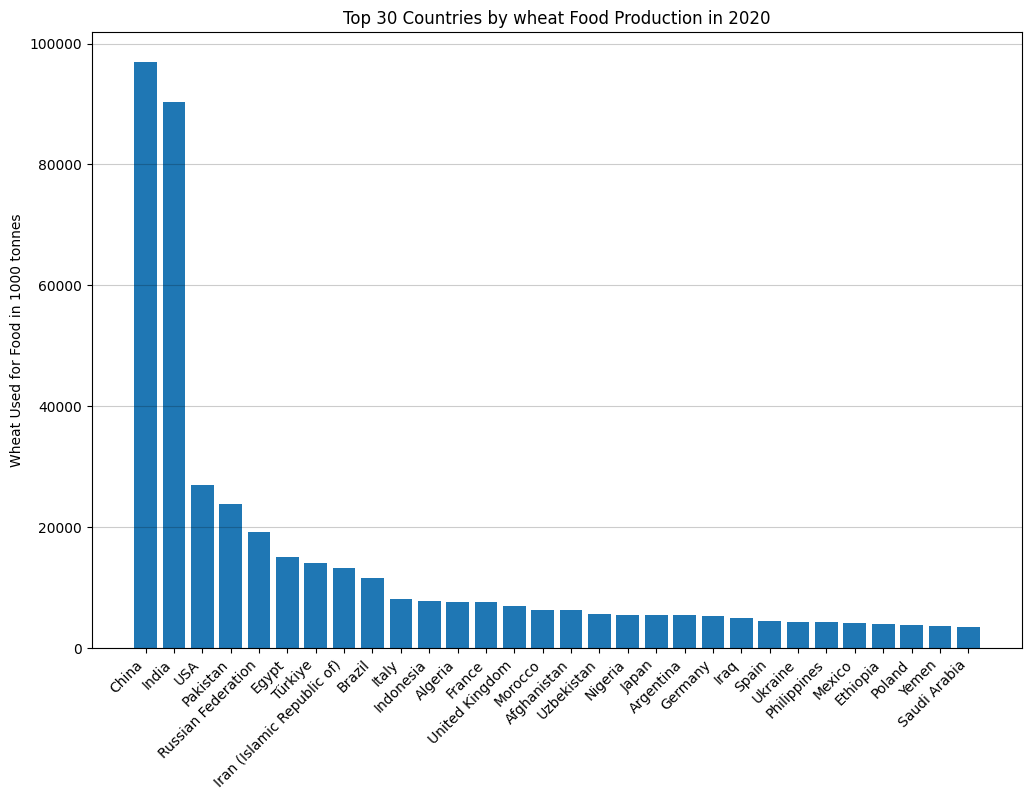

In [27]:
df_food = df_feed[(df_feed['Element'] == 'Food') & (df_feed['Item'] == 'Wheat and products') &
              (~df_feed['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 'Central America', 'Australia and New Zealand', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries'])) & 
              (df_feed['Year'] == 2020)] 

df_food = df_food.sort_values('Value', ascending=False)
topfood = df_food.head(30)

plt.figure(figsize=(12,8))
plt.bar(topfood['Area'], topfood['Value'])
plt.ylabel('Wheat Used for Food in 1000 tonnes')
plt.title("Top 30 Countries by wheat Food Production in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

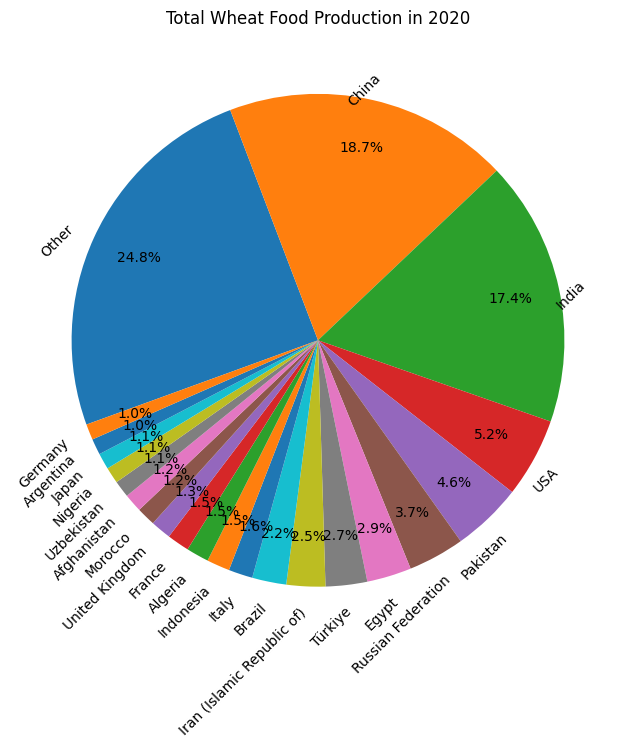

In [28]:
pivot_table = pd.pivot_table(df_food, index='Area', values='Value')
total_production = pivot_table['Value'].sum()
pivot_table['Percentage'] = pivot_table['Value'] / total_production * 100

threshold = 1.0
other_countries = pivot_table[pivot_table['Percentage'] < threshold]
other_value = other_countries['Value'].sum()
other_percentage = other_value / total_production * 100
pivot_table = pivot_table[pivot_table['Percentage'] >= threshold]
pivot_table.loc['Other'] = [other_value, other_percentage]

pivot_table = pivot_table.sort_values(by='Value', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
wedges, labels = ax.pie(pivot_table['Value'], labels=pivot_table.index, startangle=200, counterclock=False, textprops={'rotation': 45})
plt.setp(labels, rotation_mode='anchor', ha='right', va='center')
plt.title('Total Wheat Food Production in 2020')
plt.ylabel('')

for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = wedge.r * 0.8 * np.cos(np.deg2rad(angle))
    y = wedge.r * 0.8 * np.sin(np.deg2rad(angle))
    ax.text(x, y, f'{pivot_table.iloc[i]["Percentage"]:.1f}%', ha='center', va='center')

plt.show()

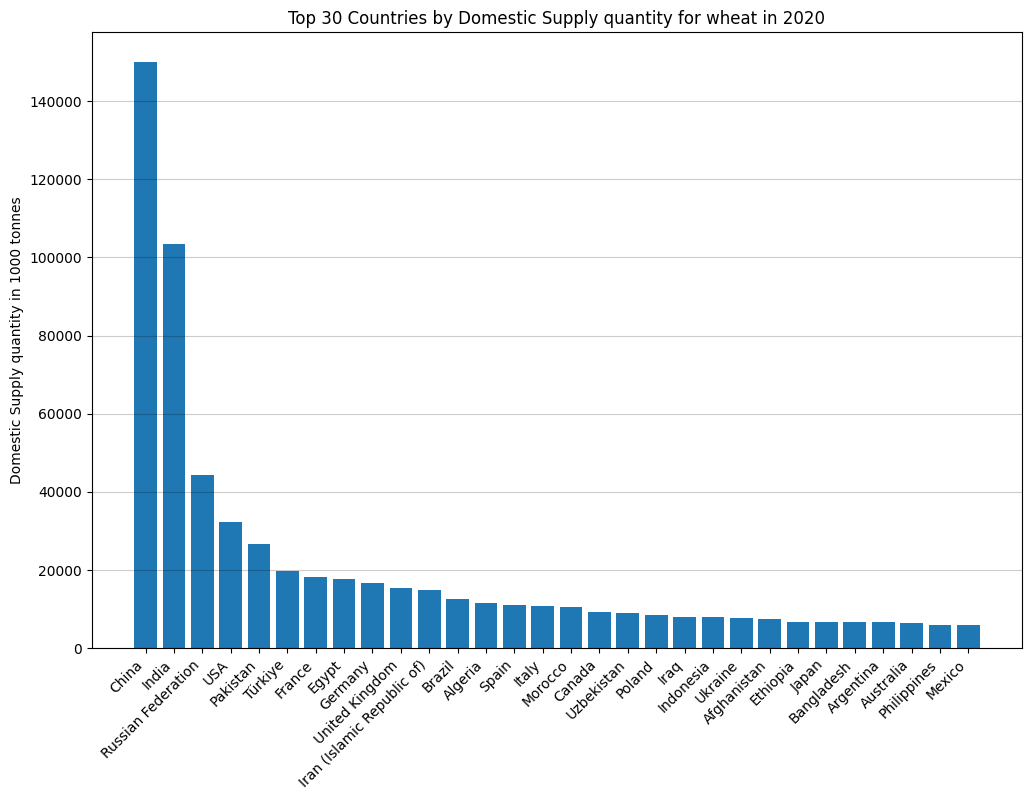

In [29]:
df_domsup = df_feed[(df_feed['Element'] == 'Domestic supply quantity') & (df_feed['Item'] == 'Wheat and products') &
              (~df_feed['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 'Central America', 'Australia and New Zealand', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries'])) & 
              (df_feed['Year'] == 2020)] 

df_domsup = df_domsup.sort_values('Value', ascending=False)
topdomsup = df_domsup.head(30)

plt.figure(figsize=(12,8))
plt.bar(topdomsup['Area'], topdomsup['Value'])
plt.ylabel('Domestic Supply quantity in 1000 tonnes')
plt.title("Top 30 Countries by Domestic Supply quantity for wheat in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

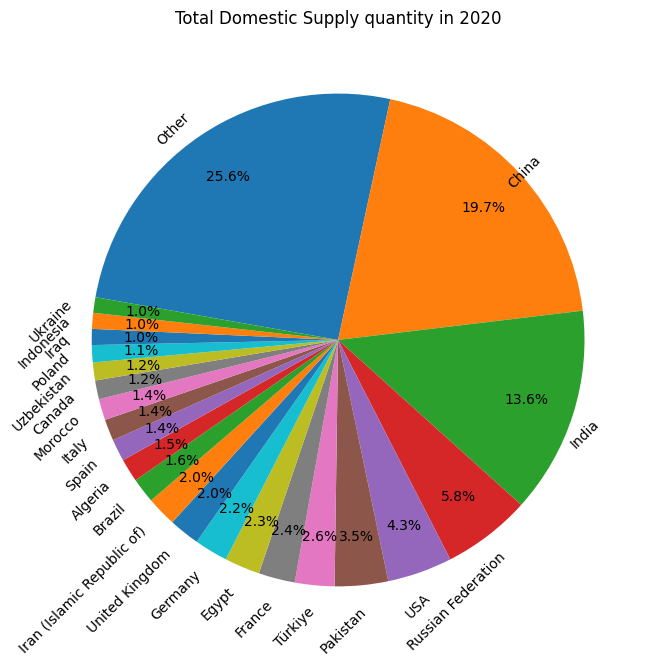

In [46]:
pivot_table = pd.pivot_table(df_domsup, index='Area', values='Value')
total_production = pivot_table['Value'].sum()
pivot_table['Percentage'] = pivot_table['Value'] / total_production * 100

threshold = 1.0
other_countries = pivot_table[pivot_table['Percentage'] < threshold]
other_value = other_countries['Value'].sum()
other_percentage = other_value / total_production * 100
pivot_table = pivot_table[pivot_table['Percentage'] >= threshold]
pivot_table.loc['Other'] = [other_value, other_percentage]

pivot_table = pivot_table.sort_values(by='Value', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
wedges, labels = ax.pie(pivot_table['Value'], labels=pivot_table.index, startangle=170, counterclock=False, textprops={'rotation': 45})
plt.setp(labels, rotation_mode='anchor', ha='right', va='center')
plt.title('Total Domestic Supply quantity in 2020')
plt.ylabel('')

for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = wedge.r * 0.8 * np.cos(np.deg2rad(angle))
    y = wedge.r * 0.8 * np.sin(np.deg2rad(angle))
    ax.text(x, y, f'{pivot_table.iloc[i]["Percentage"]:.1f}%', ha='center', va='center')

plt.show()

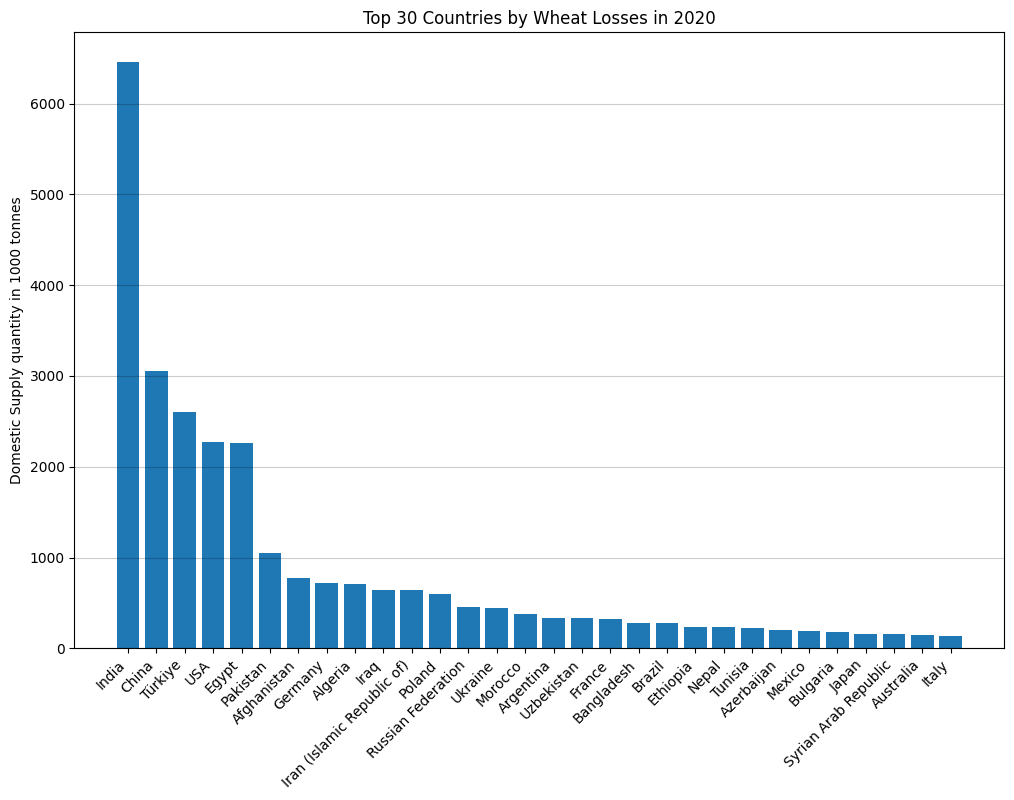

In [47]:
df_losses = df_feed[(df_feed['Element'] == 'Losses') & (df_feed['Item'] == 'Wheat and products') &
              (~df_feed['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 'Central America', 'Australia and New Zealand', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries'])) & 
              (df_feed['Year'] == 2020)] 

df_losses = df_losses.sort_values('Value', ascending=False)
toplosses = df_losses.head(30)

plt.figure(figsize=(12,8))
plt.bar(toplosses['Area'], toplosses['Value'])
plt.ylabel('Domestic Supply quantity in 1000 tonnes')
plt.title("Top 30 Countries by Wheat Losses in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

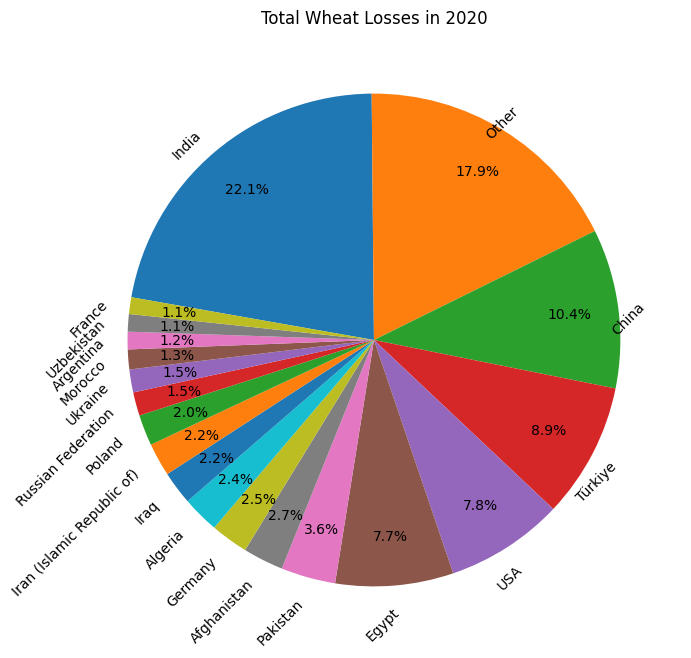

In [48]:
pivot_table = pd.pivot_table(df_losses, index='Area', values='Value')
total_production = pivot_table['Value'].sum()
pivot_table['Percentage'] = pivot_table['Value'] / total_production * 100

threshold = 1.0
other_countries = pivot_table[pivot_table['Percentage'] < threshold]
other_value = other_countries['Value'].sum()
other_percentage = other_value / total_production * 100
pivot_table = pivot_table[pivot_table['Percentage'] >= threshold]
pivot_table.loc['Other'] = [other_value, other_percentage]

pivot_table = pivot_table.sort_values(by='Value', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
wedges, labels = ax.pie(pivot_table['Value'], labels=pivot_table.index, startangle=170, counterclock=False, textprops={'rotation': 45})
plt.setp(labels, rotation_mode='anchor', ha='right', va='center')
plt.title('Total Wheat Losses in 2020')
plt.ylabel('')

for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = wedge.r * 0.8 * np.cos(np.deg2rad(angle))
    y = wedge.r * 0.8 * np.sin(np.deg2rad(angle))
    ax.text(x, y, f'{pivot_table.iloc[i]["Percentage"]:.1f}%', ha='center', va='center')

plt.show()

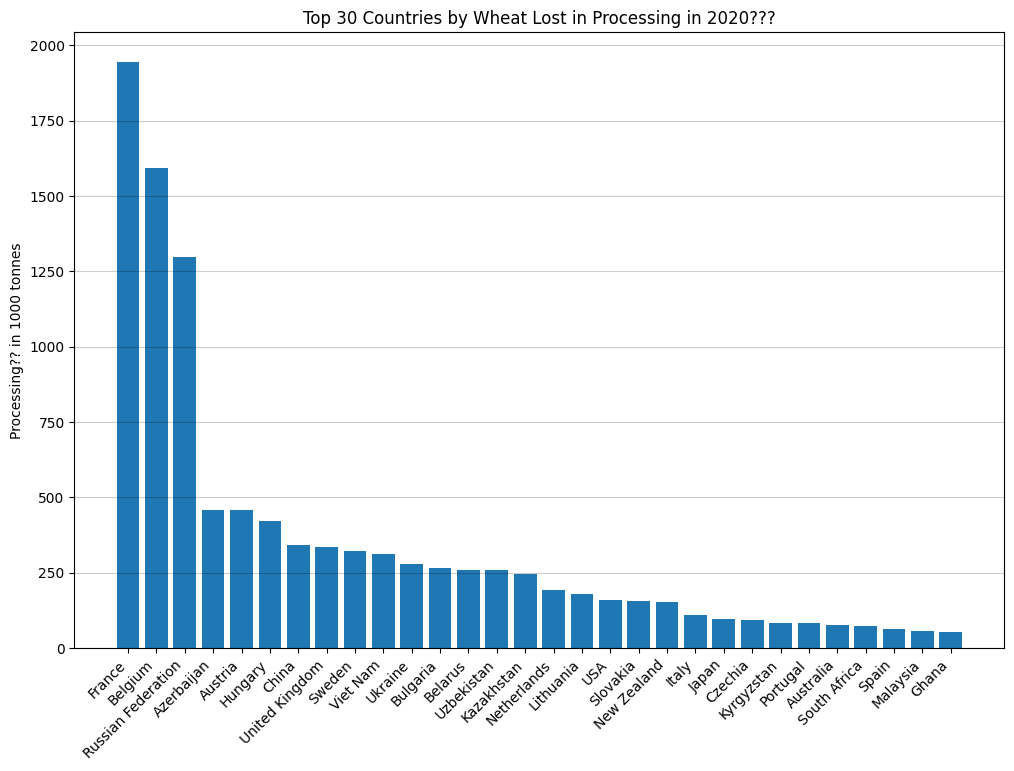

In [49]:
df_processing = df_feed[(df_feed['Element'] == 'Processing') & (df_feed['Item'] == 'Wheat and products') &
              (~df_feed['Area'].isin(['World', 'Europe', 'Africa', 'Asia', 'European Union (27)', 
                                  'China, mainland', 'Low Income Food Deficit Countries', 
                                  'Northern America', 'Net Food Importing Developing Countries', 'Least Developed Countries', 'South America', 'Central America', 'Australia and New Zealand', 
                                  'Low Income Food Deficit Countries', 'Land Locked Developing Countries'])) & 
              (df_feed['Year'] == 2020)] 

df_processing = df_processing.sort_values('Value', ascending=False)
topprocessing = df_processing.head(30)

plt.figure(figsize=(12,8))
plt.bar(topprocessing['Area'], topprocessing['Value'])
plt.ylabel('Processing?? in 1000 tonnes')
plt.title("Top 30 Countries by Wheat Lost in Processing in 2020???")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

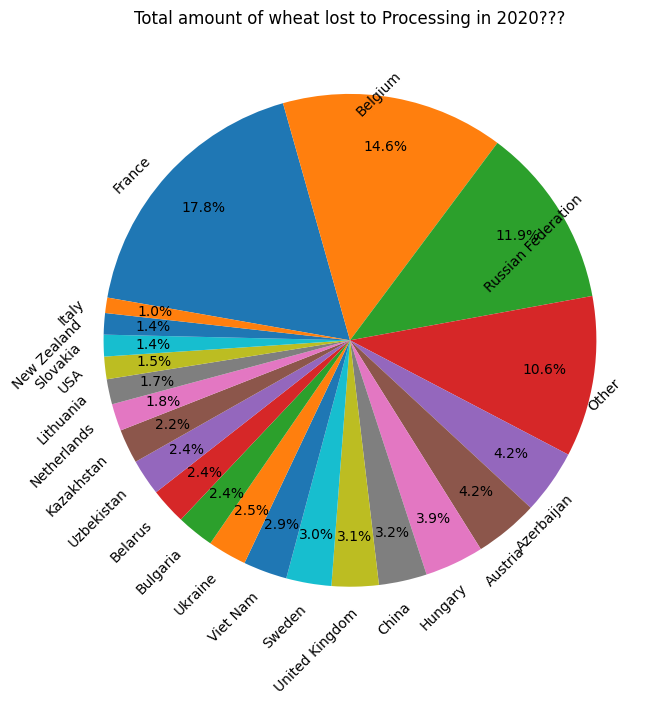

In [50]:
pivot_table = pd.pivot_table(df_processing, index='Area', values='Value')
total_production = pivot_table['Value'].sum()
pivot_table['Percentage'] = pivot_table['Value'] / total_production * 100

threshold = 1.0
other_countries = pivot_table[pivot_table['Percentage'] < threshold]
other_value = other_countries['Value'].sum()
other_percentage = other_value / total_production * 100
pivot_table = pivot_table[pivot_table['Percentage'] >= threshold]
pivot_table.loc['Other'] = [other_value, other_percentage]

pivot_table = pivot_table.sort_values(by='Value', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
wedges, labels = ax.pie(pivot_table['Value'], labels=pivot_table.index, startangle=170, counterclock=False, textprops={'rotation': 45})
plt.setp(labels, rotation_mode='anchor', ha='right', va='center')
plt.title('Total amount of wheat lost to Processing in 2020???')
plt.ylabel('')

for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = wedge.r * 0.8 * np.cos(np.deg2rad(angle))
    y = wedge.r * 0.8 * np.sin(np.deg2rad(angle))
    ax.text(x, y, f'{pivot_table.iloc[i]["Percentage"]:.1f}%', ha='center', va='center')

plt.show()

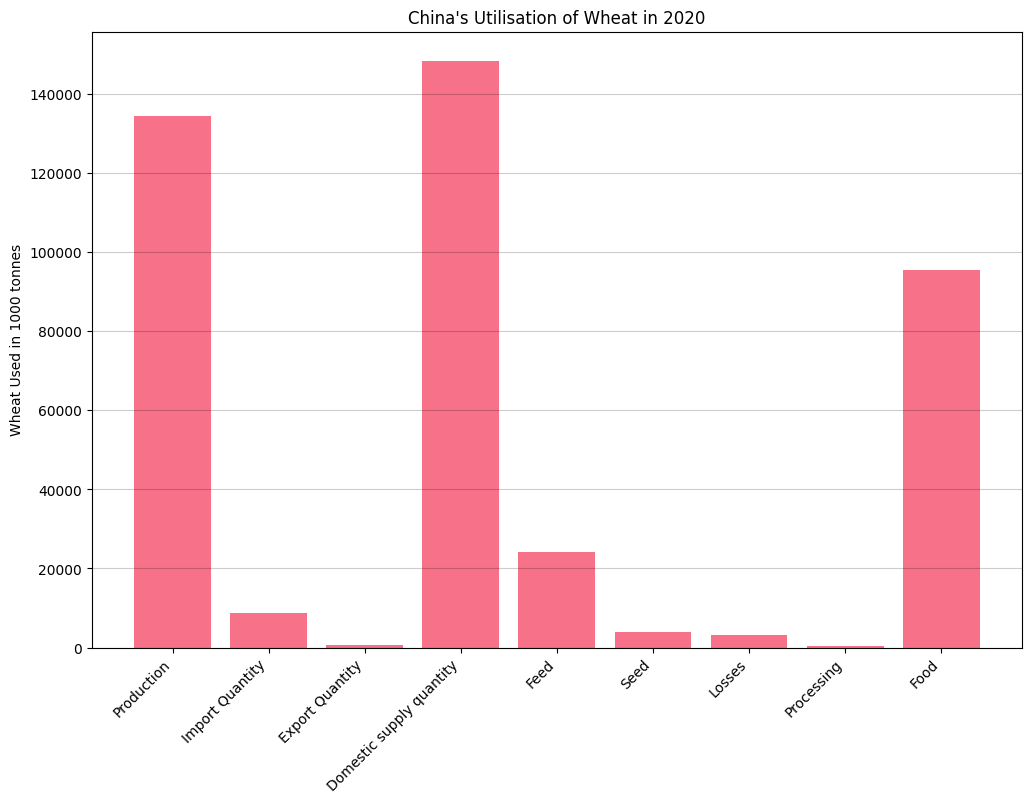

In [50]:
df_china = df_feed[(df_feed['Item'] == 'Wheat and products') & 
                   ((df_feed['Element'] == 'Production') | 
                    (df_feed['Element'] == 'Import Quantity') | 
                    (df_feed['Element'] == 'Export Quantity') | 
                    (df_feed['Element'] == 'Domestic supply quantity') | 
                    (df_feed['Element'] == 'Feed') | 
                    (df_feed['Element'] == 'Seed') | 
                    (df_feed['Element'] == 'Losses') | 
                    (df_feed['Element'] == 'Processing') | 
                    (df_feed['Element'] == 'Food')) &
                   (df_feed['Area'].isin(['China, mainland'])) & 
                   (df_feed['Year'] == 2020)] 

plt.figure(figsize=(12,8))
plt.bar(df_china['Element'], df_china['Value'])
plt.ylabel('Wheat Used in 1000 tonnes')
plt.title("China's Utilisation of Wheat in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

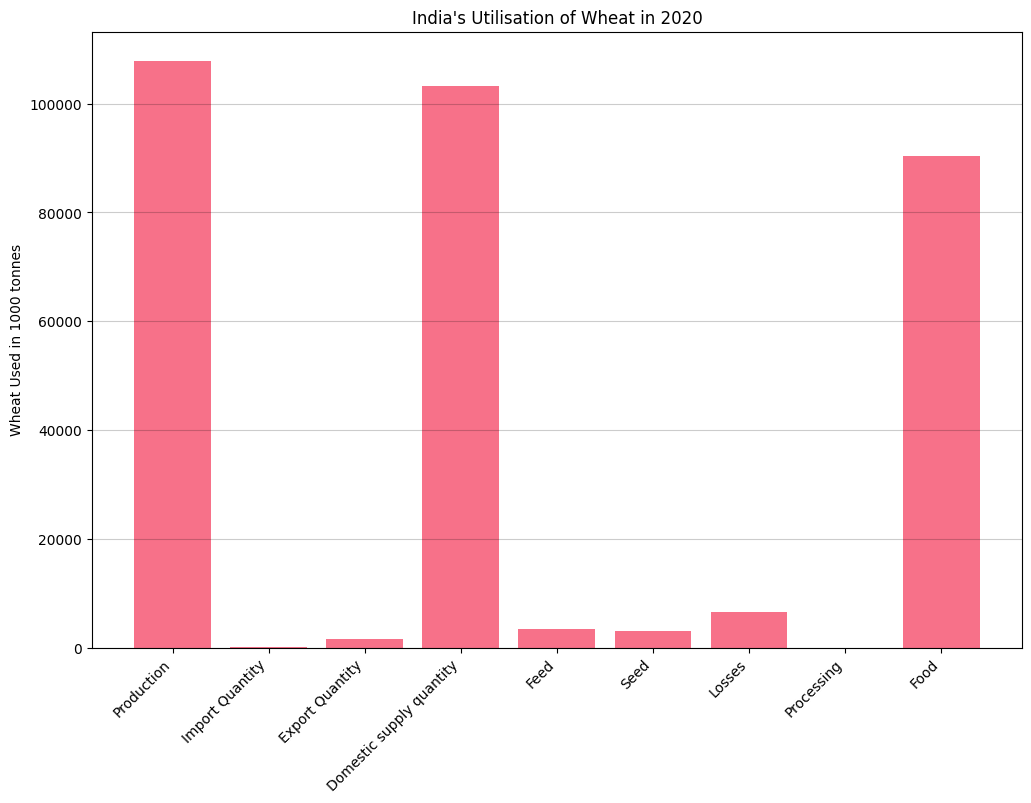

In [49]:
df_india = df_feed[(df_feed['Item'] == 'Wheat and products') & 
                   ((df_feed['Element'] == 'Production') | 
                    (df_feed['Element'] == 'Import Quantity') | 
                    (df_feed['Element'] == 'Export Quantity') | 
                    (df_feed['Element'] == 'Domestic supply quantity') | 
                    (df_feed['Element'] == 'Feed') | 
                    (df_feed['Element'] == 'Seed') | 
                    (df_feed['Element'] == 'Losses') | 
                    (df_feed['Element'] == 'Processing') | 
                    (df_feed['Element'] == 'Food')) &
                   (df_feed['Area'].isin(['India'])) & 
                   (df_feed['Year'] == 2020)] 

plt.figure(figsize=(12,8))
plt.bar(df_india['Element'], df_india['Value'])
plt.ylabel('Wheat Used in 1000 tonnes')
plt.title("India's Utilisation of Wheat in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

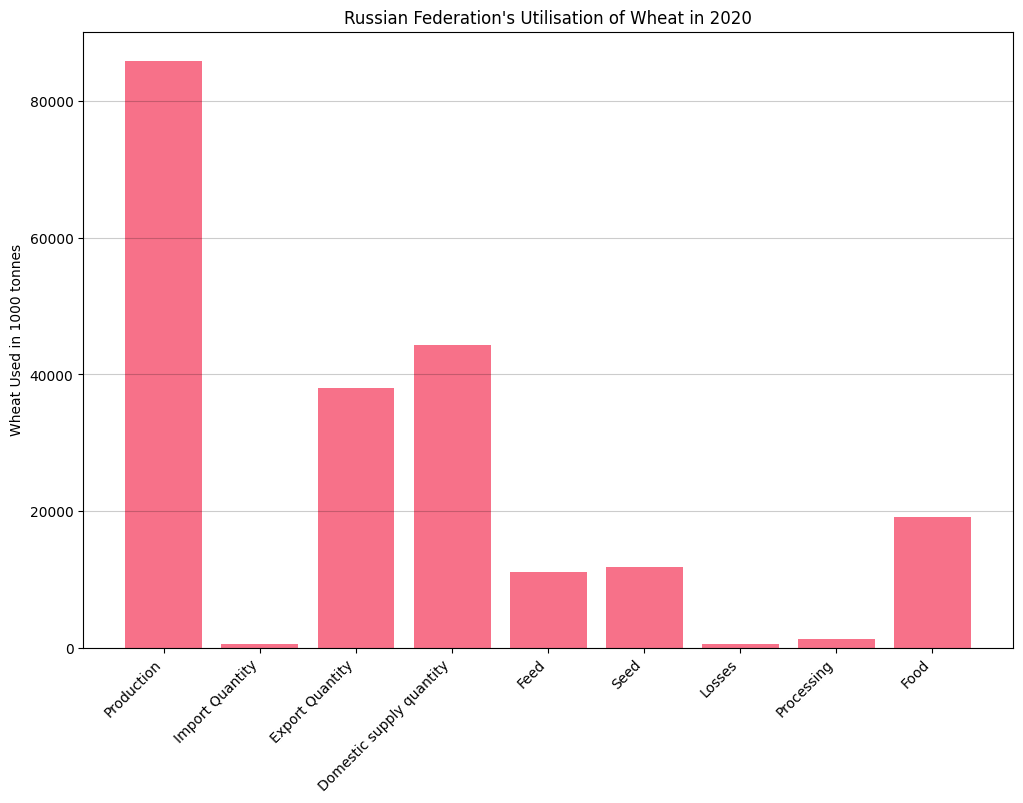

In [48]:
df_russia = df_feed[(df_feed['Item'] == 'Wheat and products') & 
                   ((df_feed['Element'] == 'Production') | 
                    (df_feed['Element'] == 'Import Quantity') | 
                    (df_feed['Element'] == 'Export Quantity') | 
                    (df_feed['Element'] == 'Domestic supply quantity') | 
                    (df_feed['Element'] == 'Feed') | 
                    (df_feed['Element'] == 'Seed') | 
                    (df_feed['Element'] == 'Losses') | 
                    (df_feed['Element'] == 'Processing') | 
                    (df_feed['Element'] == 'Food')) &
                   (df_feed['Area'].isin(['Russian Federation'])) & 
                   (df_feed['Year'] == 2020)] 

plt.figure(figsize=(12,8))
plt.bar(df_russia['Element'], df_russia['Value'])
plt.ylabel('Wheat Used in 1000 tonnes')
plt.title("Russian Federation's Utilisation of Wheat in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

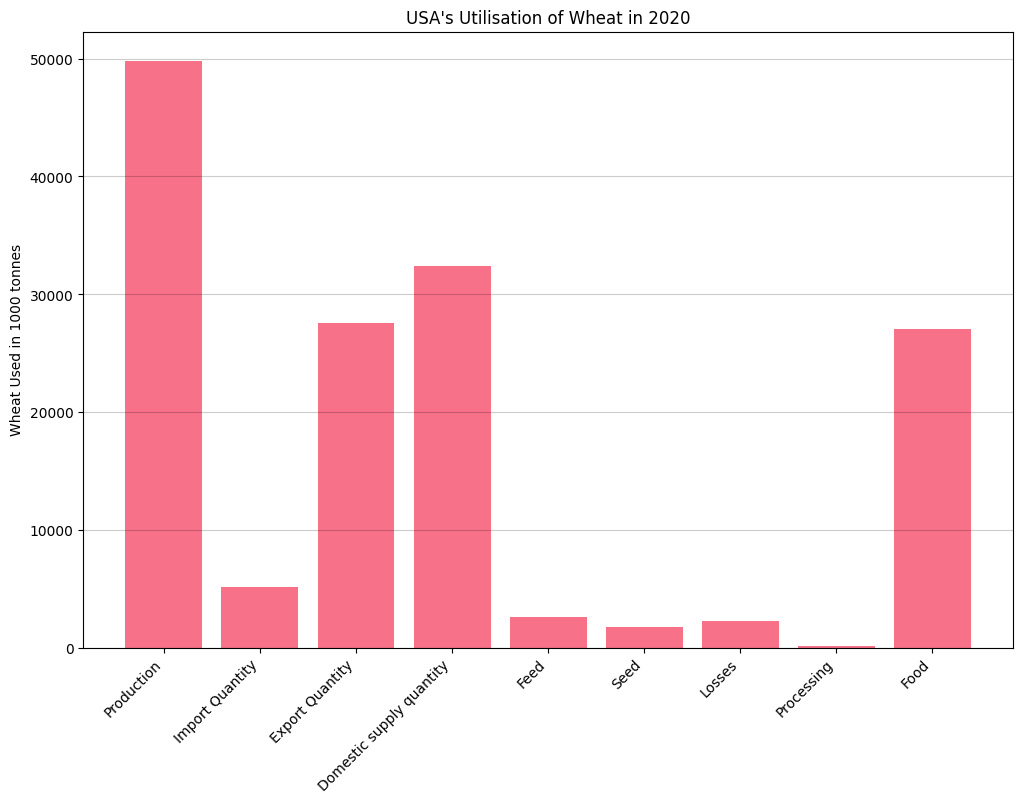

In [47]:
df_usa = df_feed[(df_feed['Item'] == 'Wheat and products') & 
                   ((df_feed['Element'] == 'Production') | 
                    (df_feed['Element'] == 'Import Quantity') | 
                    (df_feed['Element'] == 'Export Quantity') | 
                    (df_feed['Element'] == 'Domestic supply quantity') | 
                    (df_feed['Element'] == 'Feed') | 
                    (df_feed['Element'] == 'Seed') | 
                    (df_feed['Element'] == 'Losses') | 
                    (df_feed['Element'] == 'Processing') | 
                    (df_feed['Element'] == 'Food')) &
                   (df_feed['Area'].isin(['United States of America'])) & 
                   (df_feed['Year'] == 2020)] 

plt.figure(figsize=(12,8))
plt.bar(df_usa['Element'], df_usa['Value'])
plt.ylabel('Wheat Used in 1000 tonnes')
plt.title("USA's Utilisation of Wheat in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

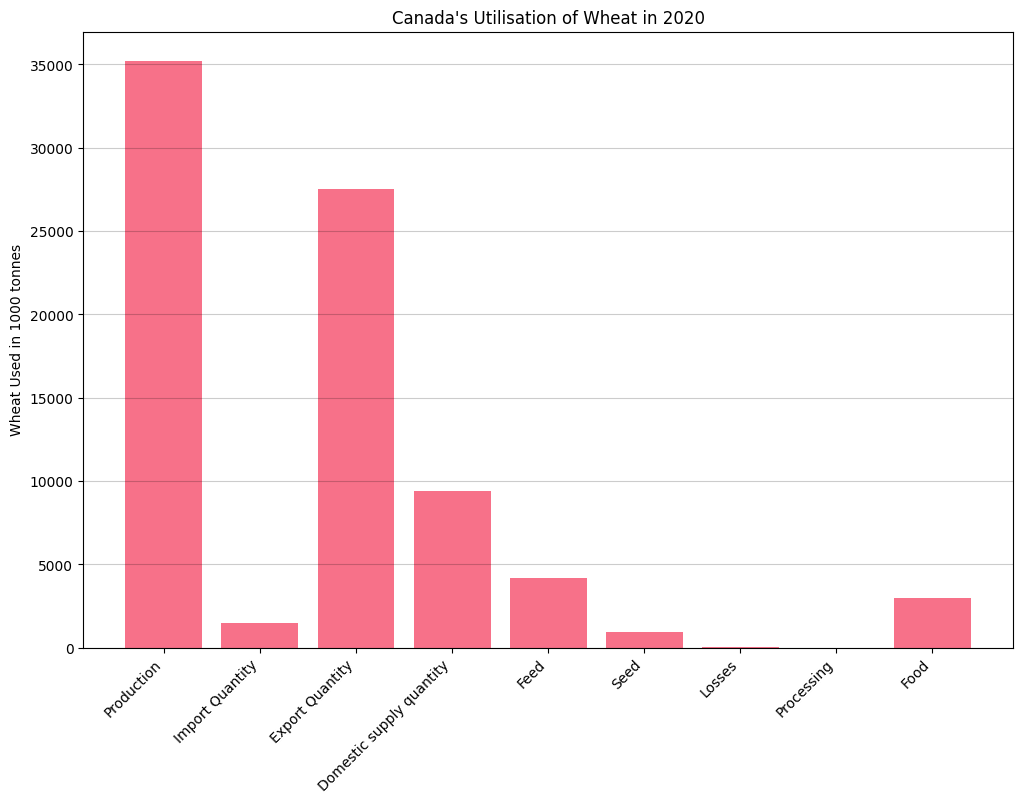

In [46]:
df_canada = df_feed[(df_feed['Item'] == 'Wheat and products') & 
                   ((df_feed['Element'] == 'Production') | 
                    (df_feed['Element'] == 'Import Quantity') | 
                    (df_feed['Element'] == 'Export Quantity') | 
                    (df_feed['Element'] == 'Domestic supply quantity') | 
                    (df_feed['Element'] == 'Feed') | 
                    (df_feed['Element'] == 'Seed') | 
                    (df_feed['Element'] == 'Losses') | 
                    (df_feed['Element'] == 'Processing') | 
                    (df_feed['Element'] == 'Food')) &
                   (df_feed['Area'].isin(['Canada'])) & 
                   (df_feed['Year'] == 2020)] 

plt.figure(figsize=(12,8))
plt.bar(df_canada['Element'], df_canada['Value'])
plt.ylabel('Wheat Used in 1000 tonnes')
plt.title("Canada's Utilisation of Wheat in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

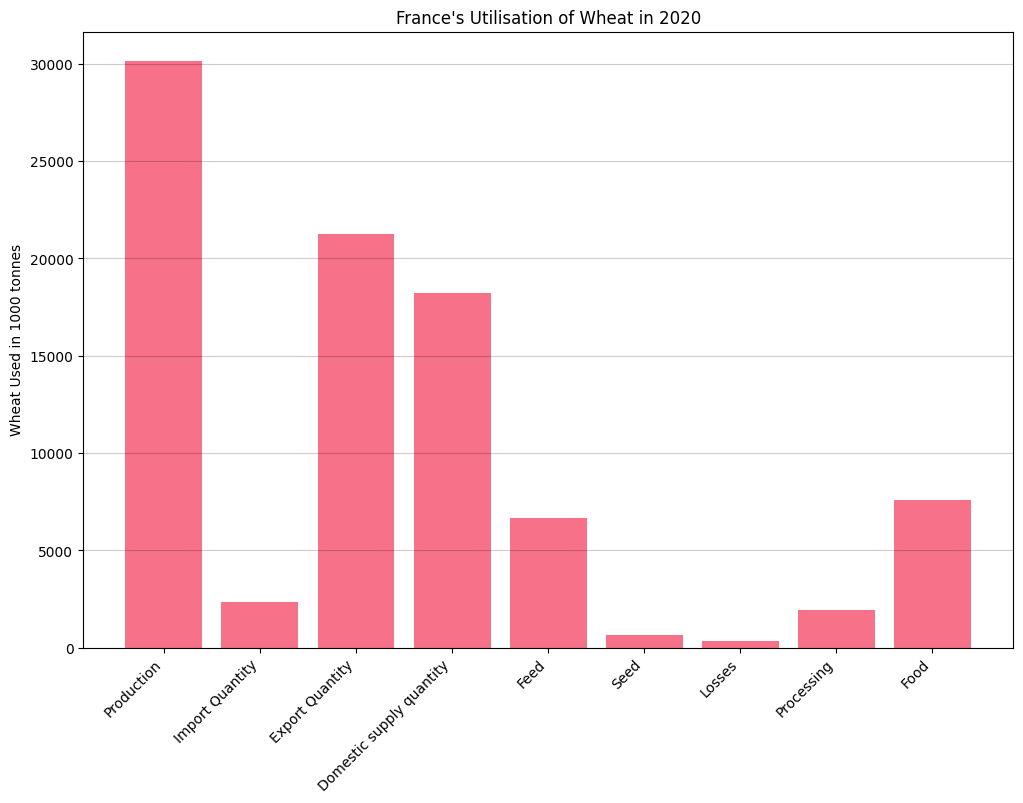

In [45]:
df_france = df_feed[(df_feed['Item'] == 'Wheat and products') & 
                   ((df_feed['Element'] == 'Production') | 
                    (df_feed['Element'] == 'Import Quantity') | 
                    (df_feed['Element'] == 'Export Quantity') | 
                    (df_feed['Element'] == 'Domestic supply quantity') | 
                    (df_feed['Element'] == 'Feed') | 
                    (df_feed['Element'] == 'Seed') | 
                    (df_feed['Element'] == 'Losses') | 
                    (df_feed['Element'] == 'Processing') | 
                    (df_feed['Element'] == 'Food')) &
                   (df_feed['Area'].isin(['France'])) & 
                   (df_feed['Year'] == 2020)] 

plt.figure(figsize=(12,8))
plt.bar(df_france['Element'], df_france['Value'])
plt.ylabel('Wheat Used in 1000 tonnes')
plt.title("France's Utilisation of Wheat in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

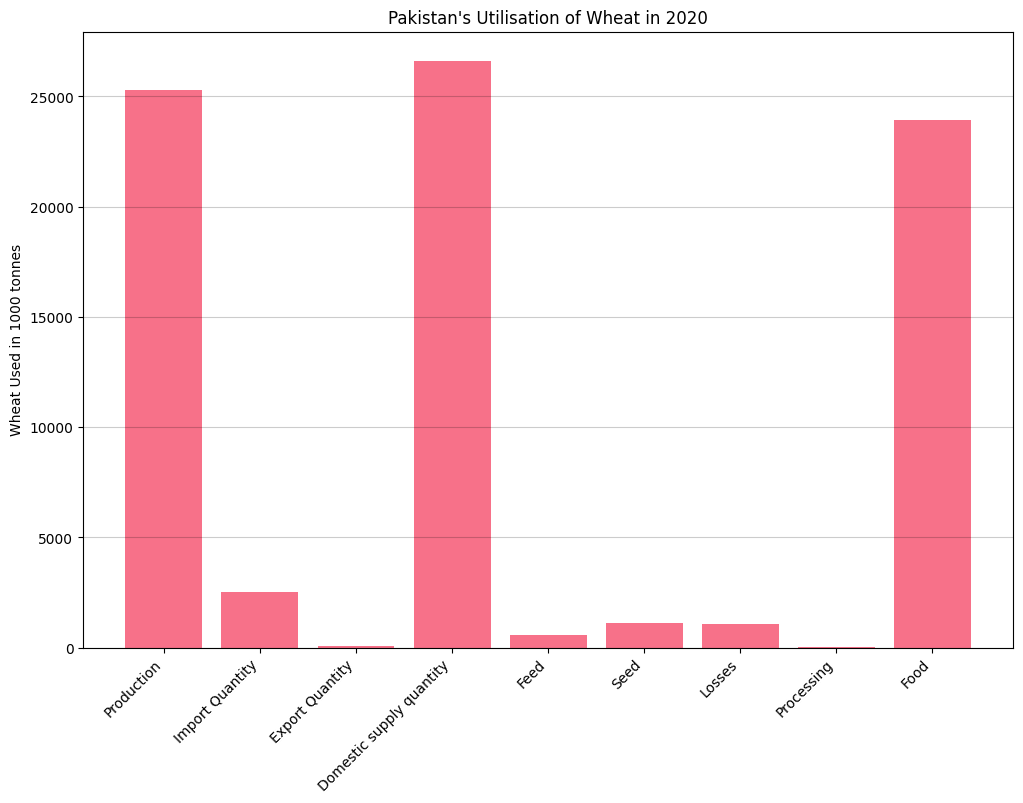

In [44]:
df_pakistan = df_feed[(df_feed['Item'] == 'Wheat and products') & 
                   ((df_feed['Element'] == 'Production') | 
                    (df_feed['Element'] == 'Import Quantity') | 
                    (df_feed['Element'] == 'Export Quantity') | 
                    (df_feed['Element'] == 'Domestic supply quantity') | 
                    (df_feed['Element'] == 'Feed') | 
                    (df_feed['Element'] == 'Seed') | 
                    (df_feed['Element'] == 'Losses') | 
                    (df_feed['Element'] == 'Processing') | 
                    (df_feed['Element'] == 'Food')) &
                   (df_feed['Area'].isin(['Pakistan'])) & 
                   (df_feed['Year'] == 2020)] 

plt.figure(figsize=(12,8))
plt.bar(df_pakistan['Element'], df_pakistan['Value'])
plt.ylabel('Wheat Used in 1000 tonnes')
plt.title("Pakistan's Utilisation of Wheat in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

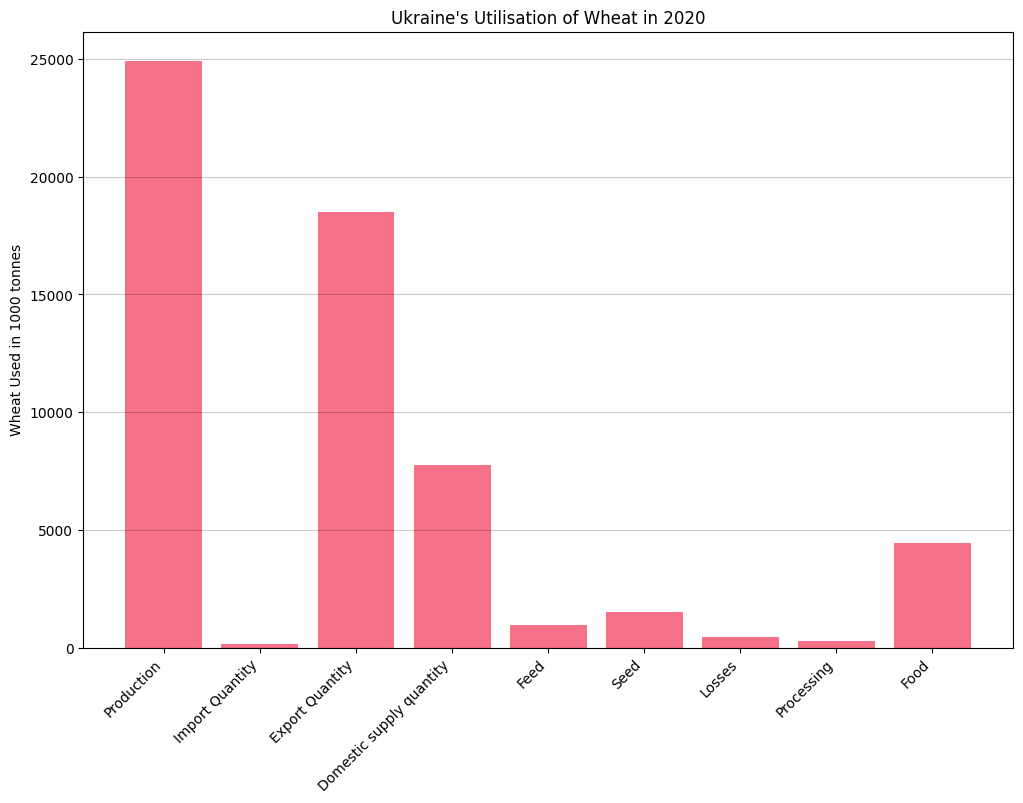

In [43]:
df_ukraine = df_feed[(df_feed['Item'] == 'Wheat and products') & 
                   ((df_feed['Element'] == 'Production') | 
                    (df_feed['Element'] == 'Import Quantity') | 
                    (df_feed['Element'] == 'Export Quantity') | 
                    (df_feed['Element'] == 'Domestic supply quantity') | 
                    (df_feed['Element'] == 'Feed') | 
                    (df_feed['Element'] == 'Seed') | 
                    (df_feed['Element'] == 'Losses') | 
                    (df_feed['Element'] == 'Processing') | 
                    (df_feed['Element'] == 'Food')) &
                   (df_feed['Area'].isin(['Ukraine'])) & 
                   (df_feed['Year'] == 2020)] 

plt.figure(figsize=(12,8))
plt.bar(df_ukraine['Element'], df_ukraine['Value'])
plt.ylabel('Wheat Used in 1000 tonnes')
plt.title("Ukraine's Utilisation of Wheat in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

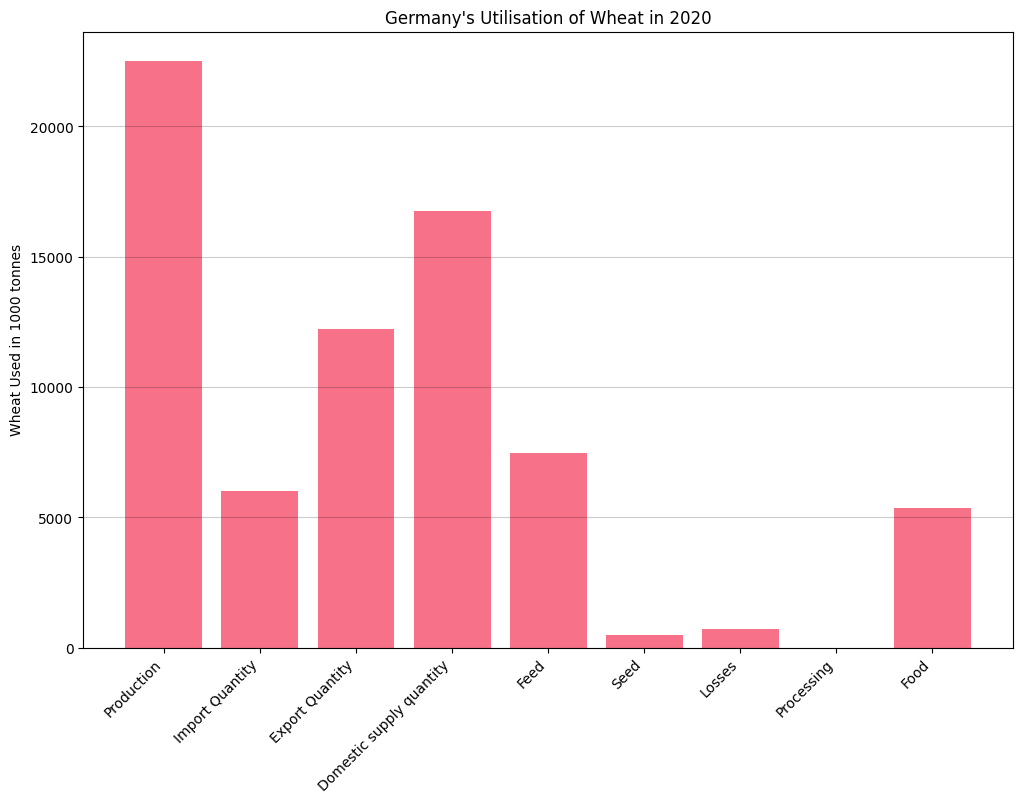

In [42]:
df_germany = df_feed[(df_feed['Item'] == 'Wheat and products') & 
                   ((df_feed['Element'] == 'Production') | 
                    (df_feed['Element'] == 'Import Quantity') | 
                    (df_feed['Element'] == 'Export Quantity') | 
                    (df_feed['Element'] == 'Domestic supply quantity') | 
                    (df_feed['Element'] == 'Feed') | 
                    (df_feed['Element'] == 'Seed') | 
                    (df_feed['Element'] == 'Losses') | 
                    (df_feed['Element'] == 'Processing') | 
                    (df_feed['Element'] == 'Food')) &
                   (df_feed['Area'].isin(['Germany'])) & 
                   (df_feed['Year'] == 2020)] 

plt.figure(figsize=(12,8))
plt.bar(df_germany['Element'], df_germany['Value'])
plt.ylabel('Wheat Used in 1000 tonnes')
plt.title("Germany's Utilisation of Wheat in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

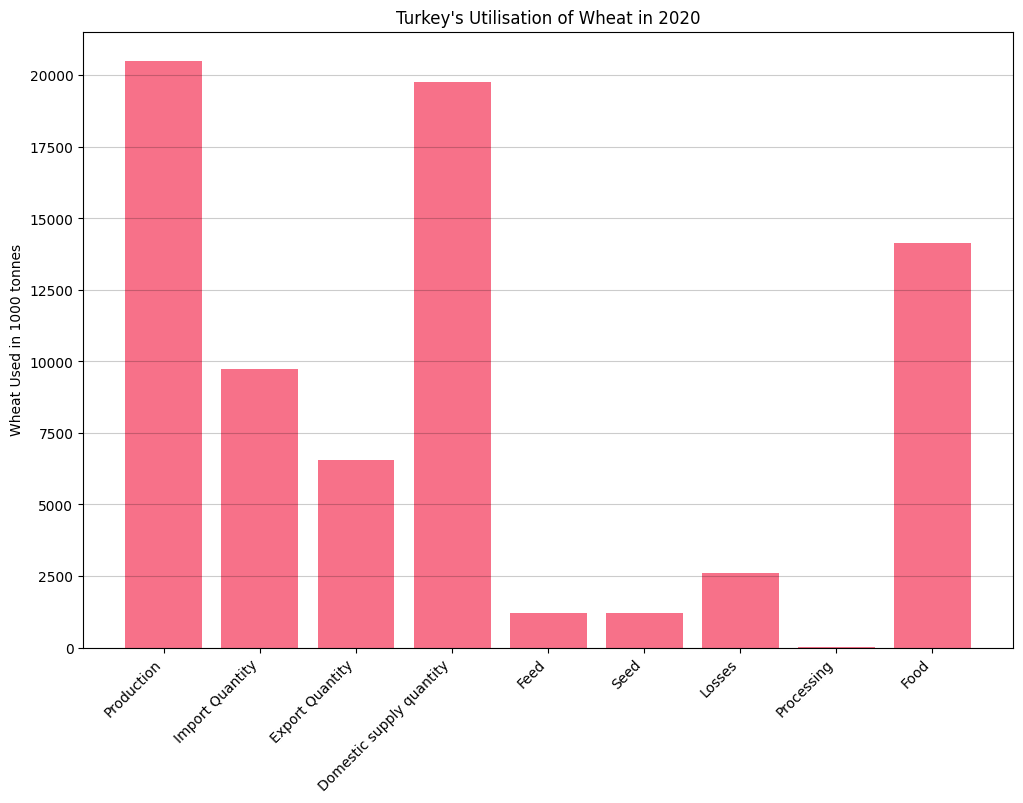

In [41]:
df_türkiye = df_feed[(df_feed['Item'] == 'Wheat and products') & 
                   ((df_feed['Element'] == 'Production') | 
                    (df_feed['Element'] == 'Import Quantity') | 
                    (df_feed['Element'] == 'Export Quantity') | 
                    (df_feed['Element'] == 'Domestic supply quantity') | 
                    (df_feed['Element'] == 'Feed') | 
                    (df_feed['Element'] == 'Seed') | 
                    (df_feed['Element'] == 'Losses') | 
                    (df_feed['Element'] == 'Processing') | 
                    (df_feed['Element'] == 'Food')) &
                   (df_feed['Area'].isin(['Türkiye'])) & 
                   (df_feed['Year'] == 2020)] 

plt.figure(figsize=(12,8))
plt.bar(df_türkiye['Element'], df_türkiye['Value'])
plt.ylabel('Wheat Used in 1000 tonnes')
plt.title("Turkey's Utilisation of Wheat in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

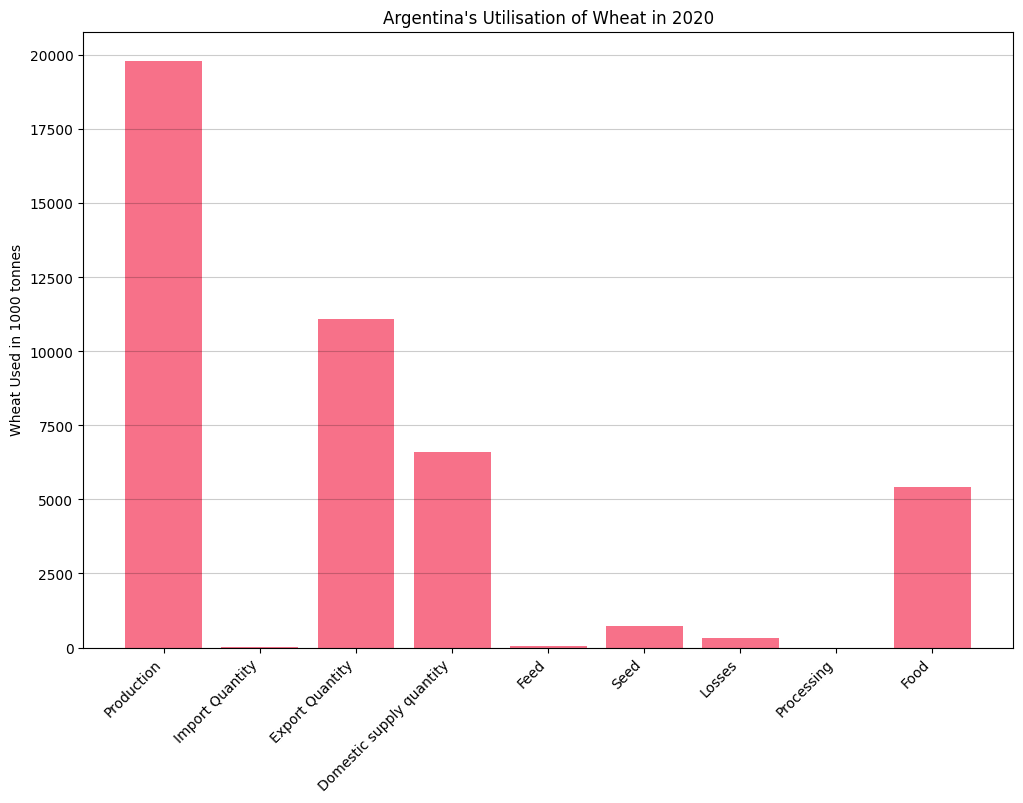

In [40]:
df_argentina = df_feed[(df_feed['Item'] == 'Wheat and products') & 
                   ((df_feed['Element'] == 'Production') | 
                    (df_feed['Element'] == 'Import Quantity') | 
                    (df_feed['Element'] == 'Export Quantity') | 
                    (df_feed['Element'] == 'Domestic supply quantity') | 
                    (df_feed['Element'] == 'Feed') | 
                    (df_feed['Element'] == 'Seed') | 
                    (df_feed['Element'] == 'Losses') | 
                    (df_feed['Element'] == 'Processing') | 
                    (df_feed['Element'] == 'Food')) &
                   (df_feed['Area'].isin(['Argentina'])) & 
                   (df_feed['Year'] == 2020)] 

plt.figure(figsize=(12,8))
plt.bar(df_argentina['Element'], df_argentina['Value'])
plt.ylabel('Wheat Used in 1000 tonnes')
plt.title("Argentina's Utilisation of Wheat in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

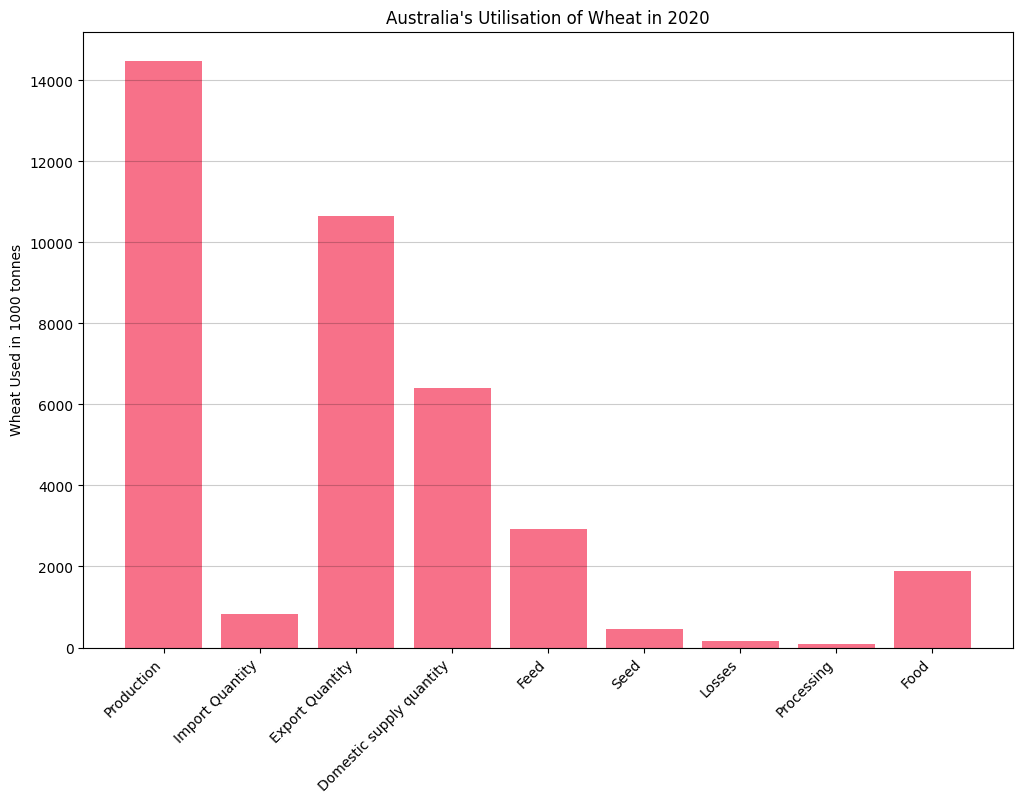

In [58]:
df_australia = df_feed[(df_feed['Item'] == 'Wheat and products') & 
                   ((df_feed['Element'] == 'Production') | 
                    (df_feed['Element'] == 'Import Quantity') | 
                    (df_feed['Element'] == 'Export Quantity') | 
                    (df_feed['Element'] == 'Domestic supply quantity') | 
                    (df_feed['Element'] == 'Feed') | 
                    (df_feed['Element'] == 'Seed') | 
                    (df_feed['Element'] == 'Losses') | 
                    (df_feed['Element'] == 'Processing') | 
                    (df_feed['Element'] == 'Food')) &
                   (df_feed['Area'].isin(['Australia'])) & 
                   (df_feed['Year'] == 2020)] 

plt.figure(figsize=(12,8))
plt.bar(df_australia['Element'], df_australia['Value'])
plt.ylabel('Wheat Used in 1000 tonnes')
plt.title("Australia's Utilisation of Wheat in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

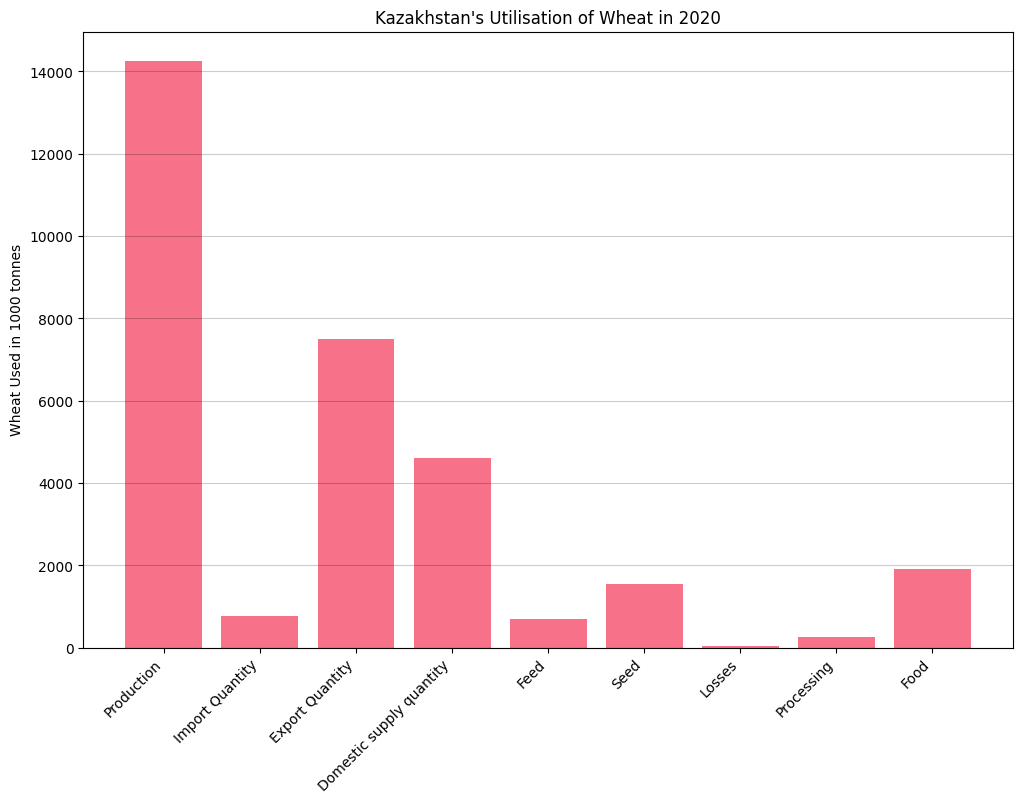

In [59]:
df_kazakhstan = df_feed[(df_feed['Item'] == 'Wheat and products') & 
                   ((df_feed['Element'] == 'Production') | 
                    (df_feed['Element'] == 'Import Quantity') | 
                    (df_feed['Element'] == 'Export Quantity') | 
                    (df_feed['Element'] == 'Domestic supply quantity') | 
                    (df_feed['Element'] == 'Feed') | 
                    (df_feed['Element'] == 'Seed') | 
                    (df_feed['Element'] == 'Losses') | 
                    (df_feed['Element'] == 'Processing') | 
                    (df_feed['Element'] == 'Food')) &
                   (df_feed['Area'].isin(['Kazakhstan'])) & 
                   (df_feed['Year'] == 2020)] 

plt.figure(figsize=(12,8))
plt.bar(df_kazakhstan['Element'], df_kazakhstan['Value'])
plt.ylabel('Wheat Used in 1000 tonnes')
plt.title("Kazakhstan's Utilisation of Wheat in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

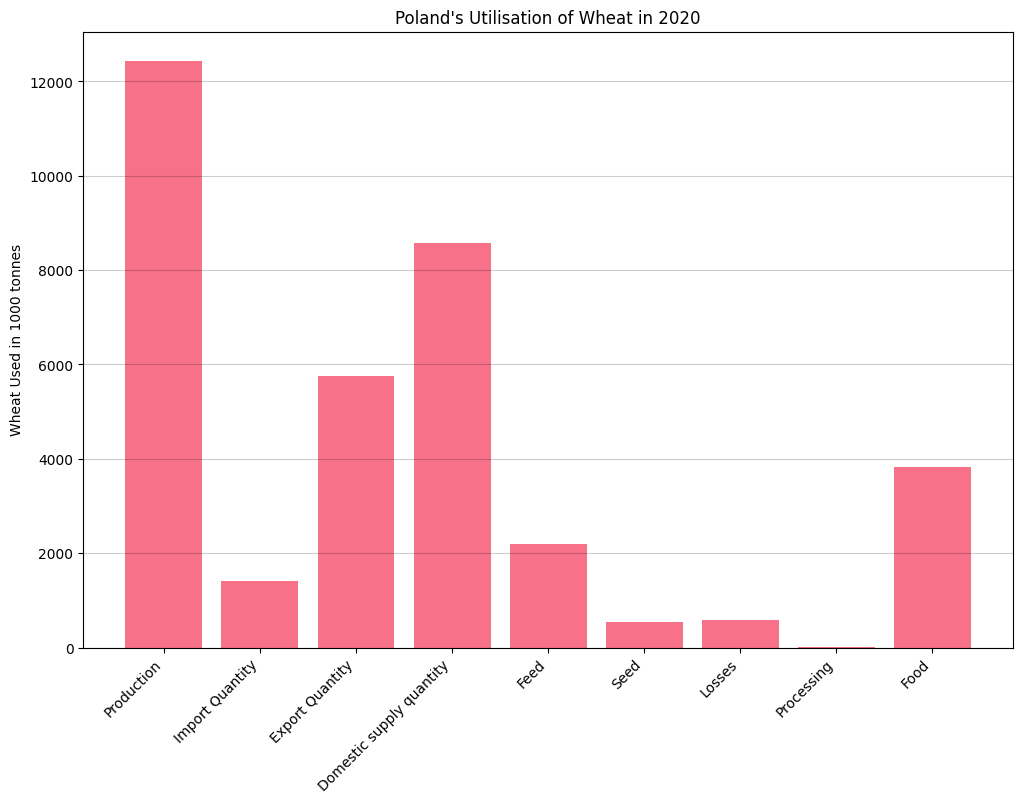

In [60]:
df_poland = df_feed[(df_feed['Item'] == 'Wheat and products') & 
                   ((df_feed['Element'] == 'Production') | 
                    (df_feed['Element'] == 'Import Quantity') | 
                    (df_feed['Element'] == 'Export Quantity') | 
                    (df_feed['Element'] == 'Domestic supply quantity') | 
                    (df_feed['Element'] == 'Feed') | 
                    (df_feed['Element'] == 'Seed') | 
                    (df_feed['Element'] == 'Losses') | 
                    (df_feed['Element'] == 'Processing') | 
                    (df_feed['Element'] == 'Food')) &
                   (df_feed['Area'].isin(['Poland'])) & 
                   (df_feed['Year'] == 2020)] 

plt.figure(figsize=(12,8))
plt.bar(df_poland['Element'], df_poland['Value'])
plt.ylabel('Wheat Used in 1000 tonnes')
plt.title("Poland's Utilisation of Wheat in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

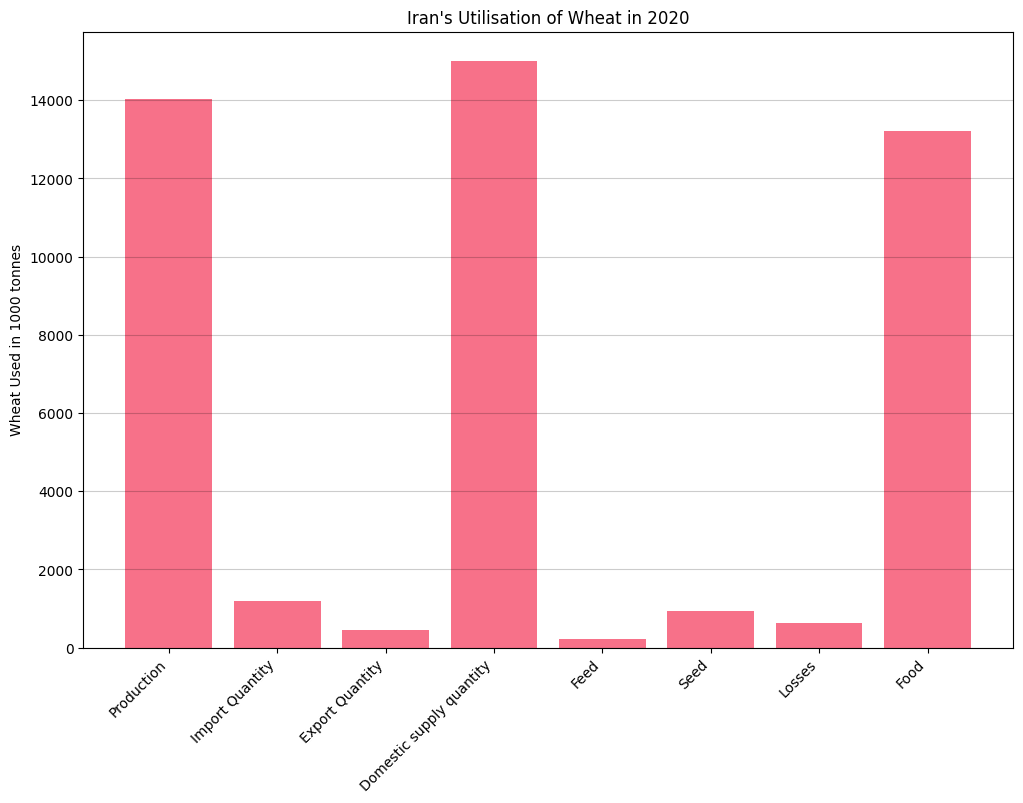

In [61]:
df_iran = df_feed[(df_feed['Item'] == 'Wheat and products') & 
                   ((df_feed['Element'] == 'Production') | 
                    (df_feed['Element'] == 'Import Quantity') | 
                    (df_feed['Element'] == 'Export Quantity') | 
                    (df_feed['Element'] == 'Domestic supply quantity') | 
                    (df_feed['Element'] == 'Feed') | 
                    (df_feed['Element'] == 'Seed') | 
                    (df_feed['Element'] == 'Losses') | 
                    (df_feed['Element'] == 'Processing') | 
                    (df_feed['Element'] == 'Food')) &
                   (df_feed['Area'].isin(['Iran (Islamic Republic of)'])) & 
                   (df_feed['Year'] == 2020)] 

plt.figure(figsize=(12,8))
plt.bar(df_iran['Element'], df_iran['Value'])
plt.ylabel('Wheat Used in 1000 tonnes')
plt.title("Iran's Utilisation of Wheat in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

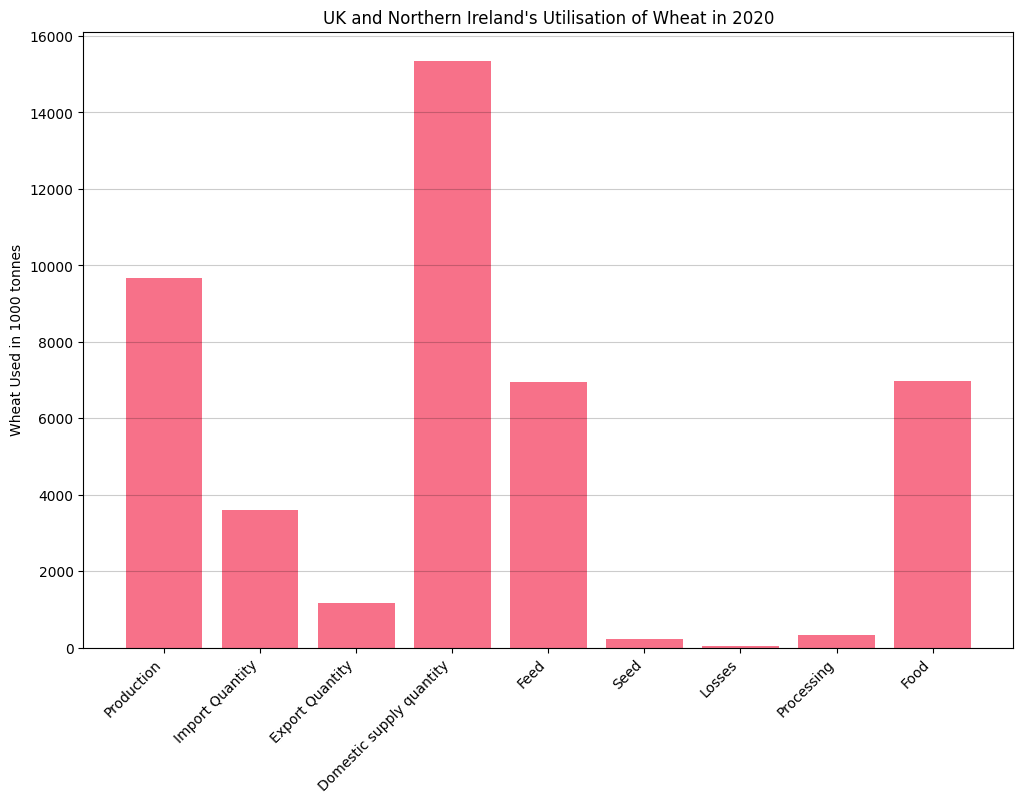

In [62]:
df_uk = df_feed[(df_feed['Item'] == 'Wheat and products') & 
                   ((df_feed['Element'] == 'Production') | 
                    (df_feed['Element'] == 'Import Quantity') | 
                    (df_feed['Element'] == 'Export Quantity') | 
                    (df_feed['Element'] == 'Domestic supply quantity') | 
                    (df_feed['Element'] == 'Feed') | 
                    (df_feed['Element'] == 'Seed') | 
                    (df_feed['Element'] == 'Losses') | 
                    (df_feed['Element'] == 'Processing') | 
                    (df_feed['Element'] == 'Food')) &
                   (df_feed['Area'].isin(['United Kingdom of Great Britain and Northern Ireland'])) & 
                   (df_feed['Year'] == 2020)] 

plt.figure(figsize=(12,8))
plt.bar(df_uk['Element'], df_uk['Value'])
plt.ylabel('Wheat Used in 1000 tonnes')
plt.title("UK and Northern Ireland's Utilisation of Wheat in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

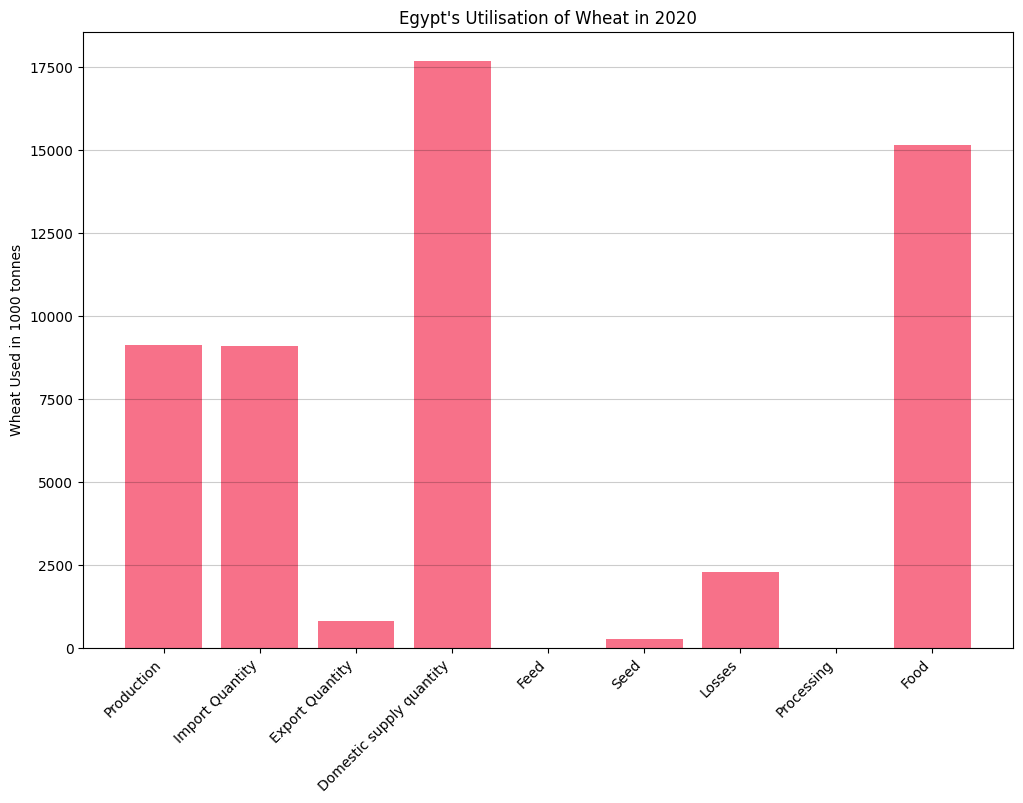

In [63]:
df_egypt = df_feed[(df_feed['Item'] == 'Wheat and products') & 
                   ((df_feed['Element'] == 'Production') | 
                    (df_feed['Element'] == 'Import Quantity') | 
                    (df_feed['Element'] == 'Export Quantity') | 
                    (df_feed['Element'] == 'Domestic supply quantity') | 
                    (df_feed['Element'] == 'Feed') | 
                    (df_feed['Element'] == 'Seed') | 
                    (df_feed['Element'] == 'Losses') | 
                    (df_feed['Element'] == 'Processing') | 
                    (df_feed['Element'] == 'Food')) &
                   (df_feed['Area'].isin(['Egypt'])) & 
                   (df_feed['Year'] == 2020)] 

plt.figure(figsize=(12,8))
plt.bar(df_egypt['Element'], df_egypt['Value'])
plt.ylabel('Wheat Used in 1000 tonnes')
plt.title("Egypt's Utilisation of Wheat in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

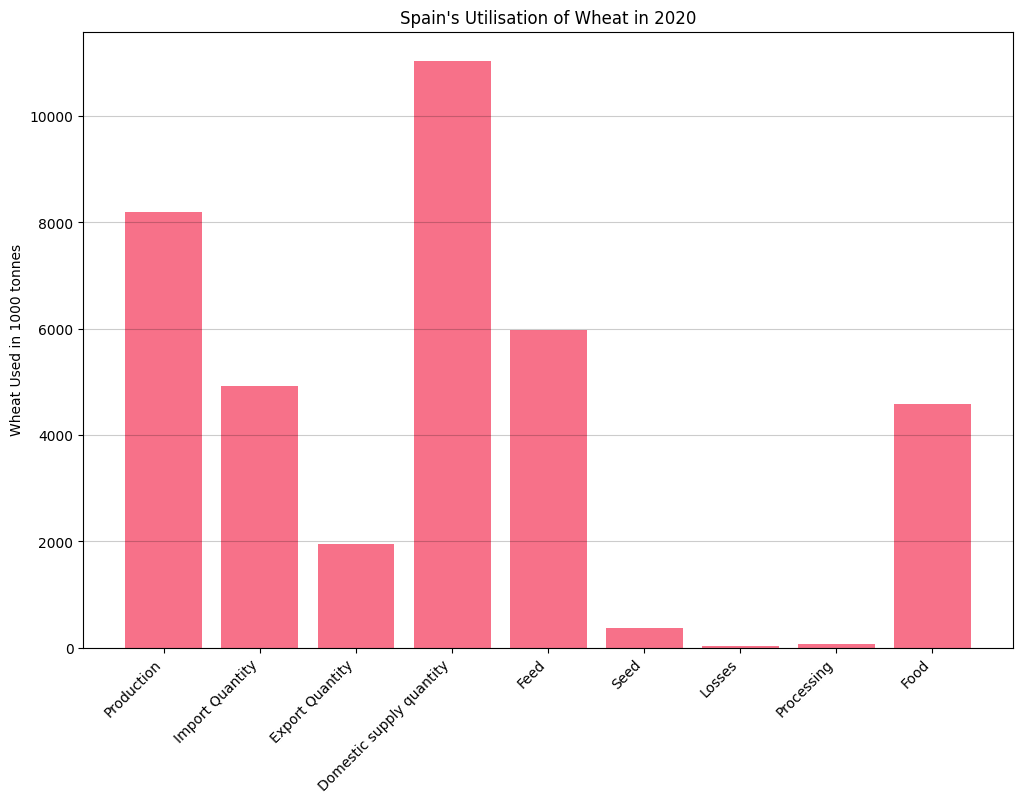

In [64]:
df_spain = df_feed[(df_feed['Item'] == 'Wheat and products') & 
                   ((df_feed['Element'] == 'Production') | 
                    (df_feed['Element'] == 'Import Quantity') | 
                    (df_feed['Element'] == 'Export Quantity') | 
                    (df_feed['Element'] == 'Domestic supply quantity') | 
                    (df_feed['Element'] == 'Feed') | 
                    (df_feed['Element'] == 'Seed') | 
                    (df_feed['Element'] == 'Losses') | 
                    (df_feed['Element'] == 'Processing') | 
                    (df_feed['Element'] == 'Food')) &
                   (df_feed['Area'].isin(['Spain'])) & 
                   (df_feed['Year'] == 2020)] 

plt.figure(figsize=(12,8))
plt.bar(df_spain['Element'], df_spain['Value'])
plt.ylabel('Wheat Used in 1000 tonnes')
plt.title("Spain's Utilisation of Wheat in 2020")
plt.xticks(rotation=45, ha='right')
plt.grid(which='major', axis='y', color='black', alpha=0.2)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for China and wheat feed in 2020
df_china = df_feed[(df_feed['Area'] == 'China, mainland') &
                   (df_feed['Item'] == 'Wheat and products') &
                   (df['Year'].between(2010, 2020))]

# Pivot the data to have the different wheat use categories as columns
pivot_table = df_china.pivot(index='Year', columns='Element', values='Value')

# Drop the columns you want to leave out
pivot_table = pivot_table.drop(columns=['Protein supply quantity (g)', 
                                        'Fat supply quantity (g)', 
                                        'Food supply (kcal/capita/day)', 
                                        'Food supply quantity (kg/capita/yr)', 
                                        'Protein supply quantity (g/capita/day)', 
                                        'Fat supply quantity (g/capita/day)', 
                                        'Residuals', 
                                        'Stock Variation'])

# Sort the columns in descending order of total usage
pivot_table = pivot_table[pivot_table.sum().sort_values(ascending=False).index.astype(str)]

# Plot the area chart
plt.figure(figsize=(10, 8))
sns.set_palette('husl', n_colors=pivot_table.shape[1])
sns.lineplot(data=pivot_table, dashes=False, linewidth=1.5, alpha=0.8)
plt.fill_between(pivot_table.index, pivot_table.iloc[:, -1], color='lightgrey', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Wheat used for animal feed in 1000 tonnes')
plt.title('Usage for animal feed in China, 2020')
plt.legend(prop={'size': 7}, loc='upper left')
plt.grid(axis='y', color='black', alpha=0.2)
plt.show()